Get the Cards and Put into Sentences

In [2]:
#import necessary libraries and get the cards
import json5
with open('cah-base-en.deck.json5', encoding='utf-8') as fh:
    d = json5.load(fh)
#d = json5.load((open('cah-base-en.deck.json5')))

In [4]:
# process black cards
# simpy mush them together and replace all dicts with a single underscore
bc = d['calls']
flatten = lambda t:[item for sublist in t for item in sublist]
bc = ["".join([x if type(x) == str else '_' for x in flatten(d['calls'][i])]) for i in range(len(d['calls']))]
bc = [i.replace("__", "_") for i in bc]
# grab white cards
wc = d['responses']
print(bc[:10])
nbc = [i for i in bc if i.count('_') <= 2]

['Hey Reddit! I’m _.Ask me anything.', 'Introducing X-treme Baseball!It’s like baseball, but with _!', 'What is Batman’s guilty pleasure?_.', 'TSA guidelines now prohibit _ on airplanes.', 'Next from J.K. Rowling: _.', 'That’s right, I killed _.How, you ask?_.', 'I’m sorry professor, but I couldn’t complete my homework because of _.', 'And the Academy Award for _ goes to _.', 'Dude, do not go in that bathroom.There’s _ in there.', 'How did I lose my virginity?_.']


In [5]:
# create all possible card combinations
# just brute force it!

import itertools
def make_card_combs(wcs, bcs):
    onec = wcs
    twoc = [i for i in itertools.permutations(wcs, 2)]
    threec = [i for i in itertools.permutations(wcs, 3)]
    bcs = [i.split("_") for i in bcs]
    plays = []

    len_one_slot = 0
    len_two_slot = 0
    len_three_slot = 0

    for bc in bcs:
        bc = [i.strip() for i in bc]
        if len(bc) == 2:
            len_one_slot +=1 
            for p in onec:
               s = bc[0] + " " + p + " " +  bc[1]
               s.replace(". ", " .")
               plays.append(s)
        
        elif len(bc) == 3:
            len_two_slot +=1
            for p in twoc:
                s = bc[0] + " " + p[0] + " " +  bc[1] + " " + p[1] + bc[2]
                s.replace(". ", " .")
                plays.append(s)
        elif len(bc) == 4:
            len_three_slot +=1
            #for p in threec:
            #   s = bc[0] + " " + p[0] + " " +  bc[1] + " " + p[1] + bc[2] + " " + p[2] + " " + bc[3]
            #   s.replace(". ", " .")
            #   plays.append(s)
        
    print("one_slot:", len_one_slot)
    print("two_slot:", len_two_slot)
    print("three_slot:", len_three_slot)
    
    return [i for i in plays if i != None]

In [6]:
#call make all cards
all_card_combs = make_card_combs(wc, nbc)
print(len(all_card_combs))

one_slot: 66
two_slot: 12
three_slot: 0
3027000


Get the Raw Embeddings

In [11]:
#import libraries
from sentence_transformers import SentenceTransformer
s_model = SentenceTransformer('average_word_embeddings_glove.6B.300d')#'distilbert-base-nli-mean-tokens')




  0%|          | 0.00/441M [00:00<?, ?B/s]


  0%|          | 32.8k/441M [00:00<46:24, 159kB/s]


  0%|          | 65.5k/441M [00:00<42:53, 172kB/s]


  0%|          | 98.3k/441M [00:00<39:17, 187kB/s]


  0%|          | 131k/441M [00:00<36:54, 199kB/s] 


  0%|          | 164k/441M [00:00<34:41, 212kB/s]


  0%|          | 197k/441M [00:00<33:41, 218kB/s]


  0%|          | 229k/441M [00:01<32:46, 224kB/s]


  0%|          | 262k/441M [00:01<32:12, 228kB/s]


  0%|          | 295k/441M [00:01<31:28, 234kB/s]


  0%|          | 328k/441M [00:01<32:46, 224kB/s]


  0%|          | 360k/441M [00:01<30:43, 239kB/s]


  0%|          | 393k/441M [00:01<30:55, 238kB/s]


  0%|          | 426k/441M [00:01<30:50, 238kB/s]


  0%|          | 459k/441M [00:02<30:31, 241kB/s]


  0%|          | 483k/441M [00:02<49:49, 148kB/s]


  0%|          | 508k/441M [00:02<44:38, 165kB/s]


  0%|          | 590k/441M [00:02<34:38, 212kB/s]


  0%|          | 624k/441M [00:02<32:50, 224kB/s]


  0%|       

  1%|          | 4.59M/441M [00:19<31:00, 235kB/s]


  1%|          | 4.62M/441M [00:19<30:29, 239kB/s]


  1%|          | 4.65M/441M [00:19<30:34, 238kB/s]


  1%|          | 4.69M/441M [00:19<30:34, 238kB/s]


  1%|          | 4.72M/441M [00:19<30:34, 238kB/s]


  1%|          | 4.74M/441M [00:20<43:01, 169kB/s]


  1%|          | 4.78M/441M [00:20<37:04, 196kB/s]


  1%|          | 4.82M/441M [00:20<46:34, 156kB/s]


  1%|          | 4.88M/441M [00:20<36:05, 202kB/s]


  1%|          | 4.92M/441M [00:20<34:02, 214kB/s]


  1%|          | 4.95M/441M [00:20<32:59, 221kB/s]


  1%|          | 4.98M/441M [00:21<32:15, 226kB/s]


  1%|          | 5.01M/441M [00:21<31:54, 228kB/s]


  1%|          | 5.05M/441M [00:21<31:25, 231kB/s]


  1%|          | 5.08M/441M [00:21<30:53, 235kB/s]


  1%|          | 5.11M/441M [00:21<30:47, 236kB/s]


  1%|          | 5.14M/441M [00:21<30:43, 237kB/s]


  1%|          | 5.18M/441M [00:21<30:43, 237kB/s]


  1%|          | 5.21M/441M [00:21<30:37, 237k

  2%|▏         | 9.31M/441M [00:39<30:15, 238kB/s]


  2%|▏         | 9.34M/441M [00:39<29:51, 241kB/s]


  2%|▏         | 9.37M/441M [00:39<30:02, 240kB/s]


  2%|▏         | 9.40M/441M [00:39<30:06, 239kB/s]


  2%|▏         | 9.44M/441M [00:39<30:08, 239kB/s]


  2%|▏         | 9.47M/441M [00:39<29:58, 240kB/s]


  2%|▏         | 9.50M/441M [00:39<29:59, 240kB/s]


  2%|▏         | 9.54M/441M [00:40<30:12, 238kB/s]


  2%|▏         | 9.56M/441M [00:40<34:17, 210kB/s]


  2%|▏         | 9.60M/441M [00:40<33:12, 217kB/s]


  2%|▏         | 9.63M/441M [00:40<44:53, 160kB/s]


  2%|▏         | 9.72M/441M [00:40<35:22, 203kB/s]


  2%|▏         | 9.75M/441M [00:41<35:32, 202kB/s]


  2%|▏         | 9.78M/441M [00:41<31:54, 225kB/s]


  2%|▏         | 9.81M/441M [00:41<31:44, 227kB/s]


  2%|▏         | 9.85M/441M [00:41<31:16, 230kB/s]


  2%|▏         | 9.88M/441M [00:41<30:58, 232kB/s]


  2%|▏         | 9.91M/441M [00:41<30:44, 234kB/s]


  2%|▏         | 9.95M/441M [00:41<30:15, 238k

  3%|▎         | 13.9M/441M [00:58<29:42, 240kB/s]


  3%|▎         | 14.0M/441M [00:58<29:42, 240kB/s]


  3%|▎         | 14.0M/441M [00:58<29:53, 238kB/s]


  3%|▎         | 14.0M/441M [00:58<29:50, 239kB/s]


  3%|▎         | 14.1M/441M [00:59<29:56, 238kB/s]


  3%|▎         | 14.1M/441M [00:59<29:33, 241kB/s]


  3%|▎         | 14.1M/441M [00:59<29:39, 240kB/s]


  3%|▎         | 14.2M/441M [00:59<29:48, 239kB/s]


  3%|▎         | 14.2M/441M [00:59<29:51, 239kB/s]


  3%|▎         | 14.2M/441M [00:59<29:52, 238kB/s]


  3%|▎         | 14.3M/441M [00:59<29:33, 241kB/s]


  3%|▎         | 14.3M/441M [00:59<29:47, 239kB/s]


  3%|▎         | 14.3M/441M [01:00<31:39, 225kB/s]


  3%|▎         | 14.3M/441M [01:00<39:48, 179kB/s]


  3%|▎         | 14.4M/441M [01:00<34:38, 205kB/s]


  3%|▎         | 14.4M/441M [01:00<33:13, 214kB/s]


  3%|▎         | 14.5M/441M [01:00<32:17, 220kB/s]


  3%|▎         | 14.5M/441M [01:00<31:34, 225kB/s]


  3%|▎         | 14.5M/441M [01:01<31:04, 229k

  4%|▍         | 18.5M/441M [01:17<32:07, 219kB/s]


  4%|▍         | 18.5M/441M [01:17<31:07, 227kB/s]


  4%|▍         | 18.5M/441M [01:17<30:37, 230kB/s]


  4%|▍         | 18.6M/441M [01:18<30:18, 233kB/s]


  4%|▍         | 18.6M/441M [01:18<30:06, 234kB/s]


  4%|▍         | 18.6M/441M [01:18<30:00, 235kB/s]


  4%|▍         | 18.7M/441M [01:18<29:57, 235kB/s]


  4%|▍         | 18.7M/441M [01:18<29:28, 239kB/s]


  4%|▍         | 18.7M/441M [01:18<29:34, 238kB/s]


  4%|▍         | 18.8M/441M [01:18<29:34, 238kB/s]


  4%|▍         | 18.8M/441M [01:18<29:38, 238kB/s]


  4%|▍         | 18.8M/441M [01:19<43:39, 161kB/s]


  4%|▍         | 18.9M/441M [01:19<33:41, 209kB/s]


  4%|▍         | 19.0M/441M [01:19<31:56, 220kB/s]


  4%|▍         | 19.0M/441M [01:19<31:31, 223kB/s]


  4%|▍         | 19.0M/441M [01:19<30:53, 228kB/s]


  4%|▍         | 19.1M/441M [01:19<30:37, 230kB/s]


  4%|▍         | 19.1M/441M [01:20<30:18, 232kB/s]


  4%|▍         | 19.1M/441M [01:20<30:05, 234k

  5%|▌         | 23.1M/441M [01:37<29:10, 239kB/s]


  5%|▌         | 23.1M/441M [01:37<45:19, 154kB/s]


  5%|▌         | 23.1M/441M [01:37<38:38, 180kB/s]


  5%|▌         | 23.2M/441M [01:37<31:17, 223kB/s]


  5%|▌         | 23.2M/441M [01:37<30:41, 227kB/s]


  5%|▌         | 23.3M/441M [01:37<30:19, 230kB/s]


  5%|▌         | 23.3M/441M [01:38<30:04, 232kB/s]


  5%|▌         | 23.3M/441M [01:38<29:27, 237kB/s]


  5%|▌         | 23.4M/441M [01:38<29:24, 237kB/s]


  5%|▌         | 23.4M/441M [01:38<29:21, 237kB/s]


  5%|▌         | 23.4M/441M [01:38<29:20, 238kB/s]


  5%|▌         | 23.5M/441M [01:38<28:59, 240kB/s]


  5%|▌         | 23.5M/441M [01:38<29:15, 238kB/s]


  5%|▌         | 23.5M/441M [01:39<29:11, 239kB/s]


  5%|▌         | 23.6M/441M [01:39<29:20, 237kB/s]


  5%|▌         | 23.6M/441M [01:39<29:18, 238kB/s]


  5%|▌         | 23.6M/441M [01:39<28:58, 240kB/s]


  5%|▌         | 23.7M/441M [01:39<29:03, 240kB/s]


  5%|▌         | 23.7M/441M [01:39<29:07, 239k

  6%|▋         | 27.7M/441M [01:56<29:46, 232kB/s]


  6%|▋         | 27.7M/441M [01:56<29:32, 233kB/s]


  6%|▋         | 27.7M/441M [01:56<29:22, 235kB/s]


  6%|▋         | 27.8M/441M [01:56<29:23, 235kB/s]


  6%|▋         | 27.8M/441M [01:57<28:49, 239kB/s]


  6%|▋         | 27.8M/441M [01:57<28:51, 239kB/s]


  6%|▋         | 27.9M/441M [01:57<28:53, 239kB/s]


  6%|▋         | 27.9M/441M [01:57<47:47, 144kB/s]


  6%|▋         | 28.0M/441M [01:57<36:53, 187kB/s]


  6%|▋         | 28.0M/441M [01:57<34:31, 200kB/s]


  6%|▋         | 28.0M/441M [01:58<32:50, 210kB/s]


  6%|▋         | 28.1M/441M [01:58<31:44, 217kB/s]


  6%|▋         | 28.1M/441M [01:58<30:32, 226kB/s]


  6%|▋         | 28.1M/441M [01:58<30:03, 229kB/s]


  6%|▋         | 28.2M/441M [01:58<29:51, 231kB/s]


  6%|▋         | 28.2M/441M [01:58<29:35, 233kB/s]


  6%|▋         | 28.2M/441M [01:58<29:00, 237kB/s]


  6%|▋         | 28.3M/441M [01:59<30:10, 228kB/s]


  6%|▋         | 28.3M/441M [01:59<30:34, 225k

  7%|▋         | 32.2M/441M [02:15<28:17, 241kB/s]


  7%|▋         | 32.3M/441M [02:15<28:27, 240kB/s]


  7%|▋         | 32.3M/441M [02:15<28:31, 239kB/s]


  7%|▋         | 32.3M/441M [02:16<28:33, 239kB/s]


  7%|▋         | 32.4M/441M [02:16<28:39, 238kB/s]


  7%|▋         | 32.4M/441M [02:16<28:20, 241kB/s]


  7%|▋         | 32.4M/441M [02:16<28:22, 240kB/s]


  7%|▋         | 32.5M/441M [02:16<28:27, 239kB/s]


  7%|▋         | 32.5M/441M [02:16<28:34, 239kB/s]


  7%|▋         | 32.5M/441M [02:16<28:35, 238kB/s]


  7%|▋         | 32.6M/441M [02:17<28:13, 241kB/s]


  7%|▋         | 32.6M/441M [02:17<28:28, 239kB/s]


  7%|▋         | 32.6M/441M [02:17<28:31, 239kB/s]


  7%|▋         | 32.7M/441M [02:17<28:33, 239kB/s]


  7%|▋         | 32.7M/441M [02:17<28:34, 238kB/s]


  7%|▋         | 32.7M/441M [02:17<28:16, 241kB/s]


  7%|▋         | 32.8M/441M [02:17<28:22, 240kB/s]


  7%|▋         | 32.8M/441M [02:18<28:27, 239kB/s]


  7%|▋         | 32.8M/441M [02:18<28:33, 238k

  8%|▊         | 36.8M/441M [02:35<28:18, 238kB/s]


  8%|▊         | 36.9M/441M [02:36<28:19, 238kB/s]


  8%|▊         | 36.9M/441M [02:36<28:22, 238kB/s]


  8%|▊         | 36.9M/441M [02:36<28:21, 238kB/s]


  8%|▊         | 37.0M/441M [02:36<28:06, 240kB/s]


  8%|▊         | 37.0M/441M [02:36<28:09, 239kB/s]


  8%|▊         | 37.0M/441M [02:36<28:16, 238kB/s]


  8%|▊         | 37.1M/441M [02:36<28:24, 237kB/s]


  8%|▊         | 37.1M/441M [02:36<28:15, 238kB/s]


  8%|▊         | 37.1M/441M [02:37<27:55, 241kB/s]


  8%|▊         | 37.2M/441M [02:37<28:02, 240kB/s]


  8%|▊         | 37.2M/441M [02:37<28:10, 239kB/s]


  8%|▊         | 37.2M/441M [02:37<28:13, 239kB/s]


  8%|▊         | 37.3M/441M [02:37<27:53, 242kB/s]


  8%|▊         | 37.3M/441M [02:37<28:11, 239kB/s]


  8%|▊         | 37.3M/441M [02:37<28:10, 239kB/s]


  8%|▊         | 37.4M/441M [02:38<28:09, 239kB/s]


  8%|▊         | 37.4M/441M [02:38<28:15, 238kB/s]


  8%|▊         | 37.4M/441M [02:38<27:51, 242k

  9%|▉         | 41.5M/441M [02:55<28:17, 236kB/s]


  9%|▉         | 41.5M/441M [02:55<29:13, 228kB/s]


  9%|▉         | 41.5M/441M [02:56<33:25, 199kB/s]


  9%|▉         | 41.6M/441M [02:56<27:39, 241kB/s]


  9%|▉         | 41.6M/441M [02:56<30:15, 220kB/s]


  9%|▉         | 41.6M/441M [02:56<41:59, 159kB/s]


  9%|▉         | 41.7M/441M [02:57<35:30, 188kB/s]


  9%|▉         | 41.8M/441M [02:57<31:45, 210kB/s]


  9%|▉         | 41.8M/441M [02:57<33:05, 201kB/s]


  9%|▉         | 41.9M/441M [02:57<35:48, 186kB/s]


 10%|▉         | 41.9M/441M [02:57<28:08, 237kB/s]


 10%|▉         | 42.0M/441M [02:58<27:36, 241kB/s]


 10%|▉         | 42.0M/441M [02:58<35:05, 190kB/s]


 10%|▉         | 42.0M/441M [02:58<41:22, 161kB/s]


 10%|▉         | 42.1M/441M [02:58<39:46, 167kB/s]


 10%|▉         | 42.1M/441M [02:59<38:42, 172kB/s]


 10%|▉         | 42.2M/441M [02:59<37:54, 176kB/s]


 10%|▉         | 42.2M/441M [02:59<32:24, 205kB/s]


 10%|▉         | 42.3M/441M [02:59<32:34, 204k

 10%|█         | 46.1M/441M [03:16<27:19, 241kB/s]


 10%|█         | 46.2M/441M [03:16<27:29, 240kB/s]


 10%|█         | 46.2M/441M [03:16<27:32, 239kB/s]


 10%|█         | 46.2M/441M [03:16<27:13, 242kB/s]


 10%|█         | 46.3M/441M [03:16<27:09, 243kB/s]


 10%|█         | 46.3M/441M [03:16<43:18, 152kB/s]


 10%|█         | 46.3M/441M [03:17<37:29, 176kB/s]


 11%|█         | 46.4M/441M [03:17<29:21, 224kB/s]


 11%|█         | 46.4M/441M [03:17<28:21, 232kB/s]


 11%|█         | 46.5M/441M [03:17<28:28, 231kB/s]


 11%|█         | 46.5M/441M [03:17<28:33, 231kB/s]


 11%|█         | 46.5M/441M [03:17<27:58, 235kB/s]


 11%|█         | 46.6M/441M [03:17<27:52, 236kB/s]


 11%|█         | 46.6M/441M [03:18<27:44, 237kB/s]


 11%|█         | 46.6M/441M [03:18<27:50, 236kB/s]


 11%|█         | 46.7M/441M [03:18<27:46, 237kB/s]


 11%|█         | 46.7M/441M [03:18<27:22, 240kB/s]


 11%|█         | 46.7M/441M [03:18<27:30, 239kB/s]


 11%|█         | 46.8M/441M [03:18<27:36, 238k

 11%|█▏        | 50.8M/441M [03:35<27:14, 239kB/s]


 12%|█▏        | 50.8M/441M [03:35<27:16, 239kB/s]


 12%|█▏        | 50.8M/441M [03:35<26:59, 241kB/s]


 12%|█▏        | 50.9M/441M [03:35<27:09, 240kB/s]


 12%|█▏        | 50.9M/441M [03:36<27:12, 239kB/s]


 12%|█▏        | 50.9M/441M [03:36<27:15, 239kB/s]


 12%|█▏        | 51.0M/441M [03:36<27:20, 238kB/s]


 12%|█▏        | 51.0M/441M [03:36<26:58, 241kB/s]


 12%|█▏        | 51.0M/441M [03:36<27:04, 240kB/s]


 12%|█▏        | 51.0M/441M [03:36<46:07, 141kB/s]


 12%|█▏        | 51.1M/441M [03:37<38:40, 168kB/s]


 12%|█▏        | 51.2M/441M [03:37<30:46, 211kB/s]


 12%|█▏        | 51.2M/441M [03:37<29:47, 218kB/s]


 12%|█▏        | 51.2M/441M [03:37<29:09, 223kB/s]


 12%|█▏        | 51.3M/441M [03:37<28:29, 228kB/s]


 12%|█▏        | 51.3M/441M [03:37<27:50, 234kB/s]


 12%|█▏        | 51.3M/441M [03:37<27:40, 235kB/s]


 12%|█▏        | 51.4M/441M [03:38<27:33, 236kB/s]


 12%|█▏        | 51.4M/441M [03:38<27:36, 236k

 13%|█▎        | 55.4M/441M [03:54<26:55, 239kB/s]


 13%|█▎        | 55.4M/441M [03:55<27:07, 237kB/s]


 13%|█▎        | 55.4M/441M [03:55<26:55, 239kB/s]


 13%|█▎        | 55.5M/441M [03:55<26:46, 240kB/s]


 13%|█▎        | 55.5M/441M [03:55<26:51, 240kB/s]


 13%|█▎        | 55.5M/441M [03:55<26:54, 239kB/s]


 13%|█▎        | 55.6M/441M [03:55<27:00, 238kB/s]


 13%|█▎        | 55.6M/441M [03:55<26:42, 241kB/s]


 13%|█▎        | 55.6M/441M [03:55<26:48, 240kB/s]


 13%|█▎        | 55.7M/441M [03:56<26:55, 239kB/s]


 13%|█▎        | 55.7M/441M [03:56<26:57, 238kB/s]


 13%|█▎        | 55.7M/441M [03:56<26:58, 238kB/s]


 13%|█▎        | 55.8M/441M [03:56<26:38, 241kB/s]


 13%|█▎        | 55.8M/441M [03:56<26:48, 240kB/s]


 13%|█▎        | 55.8M/441M [03:56<41:23, 155kB/s]


 13%|█▎        | 55.9M/441M [03:57<36:32, 176kB/s]


 13%|█▎        | 56.0M/441M [03:57<29:29, 218kB/s]


 13%|█▎        | 56.0M/441M [03:57<28:48, 223kB/s]


 13%|█▎        | 56.0M/441M [03:57<28:15, 227k

 14%|█▎        | 60.0M/441M [04:14<27:09, 234kB/s]


 14%|█▎        | 60.1M/441M [04:14<26:43, 238kB/s]


 14%|█▎        | 60.1M/441M [04:14<26:43, 238kB/s]


 14%|█▎        | 60.1M/441M [04:14<26:43, 238kB/s]


 14%|█▎        | 60.2M/441M [04:14<26:46, 237kB/s]


 14%|█▎        | 60.2M/441M [04:15<26:45, 238kB/s]


 14%|█▎        | 60.2M/441M [04:15<26:26, 240kB/s]


 14%|█▎        | 60.3M/441M [04:15<26:30, 240kB/s]


 14%|█▎        | 60.3M/441M [04:15<26:34, 239kB/s]


 14%|█▎        | 60.3M/441M [04:15<26:39, 238kB/s]


 14%|█▎        | 60.4M/441M [04:15<26:22, 241kB/s]


 14%|█▎        | 60.4M/441M [04:15<26:31, 239kB/s]


 14%|█▎        | 60.4M/441M [04:16<26:30, 240kB/s]


 14%|█▎        | 60.5M/441M [04:16<26:36, 239kB/s]


 14%|█▎        | 60.5M/441M [04:16<26:41, 238kB/s]


 14%|█▎        | 60.5M/441M [04:16<26:20, 241kB/s]


 14%|█▎        | 60.6M/441M [04:16<26:25, 240kB/s]


 14%|█▎        | 60.6M/441M [04:16<26:30, 240kB/s]


 14%|█▎        | 60.6M/441M [04:17<41:00, 155k

 15%|█▍        | 64.7M/441M [04:34<26:25, 238kB/s]


 15%|█▍        | 64.8M/441M [04:34<26:24, 238kB/s]


 15%|█▍        | 64.8M/441M [04:34<26:24, 238kB/s]


 15%|█▍        | 64.8M/441M [04:34<26:03, 241kB/s]


 15%|█▍        | 64.9M/441M [04:34<26:12, 239kB/s]


 15%|█▍        | 64.9M/441M [04:34<26:15, 239kB/s]


 15%|█▍        | 64.9M/441M [04:35<26:17, 239kB/s]


 15%|█▍        | 65.0M/441M [04:35<26:21, 238kB/s]


 15%|█▍        | 65.0M/441M [04:35<26:04, 241kB/s]


 15%|█▍        | 65.0M/441M [04:35<26:09, 240kB/s]


 15%|█▍        | 65.1M/441M [04:35<26:13, 239kB/s]


 15%|█▍        | 65.1M/441M [04:35<26:19, 238kB/s]


 15%|█▍        | 65.1M/441M [04:35<25:59, 241kB/s]


 15%|█▍        | 65.2M/441M [04:35<26:06, 240kB/s]


 15%|█▍        | 65.2M/441M [04:36<26:13, 239kB/s]


 15%|█▍        | 65.2M/441M [04:36<26:19, 238kB/s]


 15%|█▍        | 65.3M/441M [04:36<26:15, 239kB/s]


 15%|█▍        | 65.3M/441M [04:36<26:03, 241kB/s]


 15%|█▍        | 65.3M/441M [04:36<26:08, 240k

 16%|█▌        | 69.5M/441M [04:53<25:59, 238kB/s]


 16%|█▌        | 69.5M/441M [04:54<26:00, 238kB/s]


 16%|█▌        | 69.6M/441M [04:54<26:07, 237kB/s]


 16%|█▌        | 69.6M/441M [04:54<26:06, 237kB/s]


 16%|█▌        | 69.6M/441M [04:54<25:47, 240kB/s]


 16%|█▌        | 69.6M/441M [04:54<25:52, 239kB/s]


 16%|█▌        | 69.7M/441M [04:54<25:55, 239kB/s]


 16%|█▌        | 69.7M/441M [04:54<26:01, 238kB/s]


 16%|█▌        | 69.7M/441M [04:55<26:01, 238kB/s]


 16%|█▌        | 69.8M/441M [04:55<25:41, 241kB/s]


 16%|█▌        | 69.8M/441M [04:55<25:47, 240kB/s]


 16%|█▌        | 69.8M/441M [04:55<25:55, 239kB/s]


 16%|█▌        | 69.9M/441M [04:55<26:00, 238kB/s]


 16%|█▌        | 69.9M/441M [04:55<25:40, 241kB/s]


 16%|█▌        | 69.9M/441M [04:55<25:46, 240kB/s]


 16%|█▌        | 70.0M/441M [04:56<25:53, 239kB/s]


 16%|█▌        | 70.0M/441M [04:56<25:58, 238kB/s]


 16%|█▌        | 70.0M/441M [04:56<25:55, 239kB/s]


 16%|█▌        | 70.1M/441M [04:56<25:40, 241k

 17%|█▋        | 74.0M/441M [05:13<26:02, 235kB/s]


 17%|█▋        | 74.1M/441M [05:13<25:40, 239kB/s]


 17%|█▋        | 74.1M/441M [05:13<25:41, 238kB/s]


 17%|█▋        | 74.1M/441M [05:13<25:44, 238kB/s]


 17%|█▋        | 74.2M/441M [05:13<25:44, 238kB/s]


 17%|█▋        | 74.2M/441M [05:13<25:43, 238kB/s]


 17%|█▋        | 74.2M/441M [05:13<25:26, 241kB/s]


 17%|█▋        | 74.3M/441M [05:14<25:34, 239kB/s]


 17%|█▋        | 74.3M/441M [05:14<25:41, 238kB/s]


 17%|█▋        | 74.3M/441M [05:14<25:38, 239kB/s]


 17%|█▋        | 74.4M/441M [05:14<25:22, 241kB/s]


 17%|█▋        | 74.4M/441M [05:14<25:28, 240kB/s]


 17%|█▋        | 74.4M/441M [05:14<25:33, 239kB/s]


 17%|█▋        | 74.5M/441M [05:14<25:38, 238kB/s]


 17%|█▋        | 74.5M/441M [05:15<25:39, 238kB/s]


 17%|█▋        | 74.5M/441M [05:15<25:23, 241kB/s]


 17%|█▋        | 74.6M/441M [05:15<25:31, 240kB/s]


 17%|█▋        | 74.6M/441M [05:15<25:34, 239kB/s]


 17%|█▋        | 74.6M/441M [05:15<25:36, 239k

 18%|█▊        | 78.7M/441M [05:32<26:20, 230kB/s]


 18%|█▊        | 78.7M/441M [05:32<26:03, 232kB/s]


 18%|█▊        | 78.8M/441M [05:32<25:54, 233kB/s]


 18%|█▊        | 78.8M/441M [05:33<25:45, 235kB/s]


 18%|█▊        | 78.8M/441M [05:33<25:38, 236kB/s]


 18%|█▊        | 78.9M/441M [05:33<25:14, 239kB/s]


 18%|█▊        | 78.9M/441M [05:33<25:16, 239kB/s]


 18%|█▊        | 78.9M/441M [05:33<25:21, 238kB/s]


 18%|█▊        | 79.0M/441M [05:33<25:22, 238kB/s]


 18%|█▊        | 79.0M/441M [05:33<25:08, 240kB/s]


 18%|█▊        | 79.0M/441M [05:33<25:12, 240kB/s]


 18%|█▊        | 79.1M/441M [05:34<25:15, 239kB/s]


 18%|█▊        | 79.1M/441M [05:34<25:24, 238kB/s]


 18%|█▊        | 79.1M/441M [05:34<25:20, 238kB/s]


 18%|█▊        | 79.2M/441M [05:34<25:01, 241kB/s]


 18%|█▊        | 79.2M/441M [05:34<25:13, 239kB/s]


 18%|█▊        | 79.2M/441M [05:34<27:08, 222kB/s]


 18%|█▊        | 79.2M/441M [05:35<39:55, 151kB/s]


 18%|█▊        | 79.3M/441M [05:35<31:31, 191k

 19%|█▉        | 83.3M/441M [05:52<25:34, 233kB/s]


 19%|█▉        | 83.4M/441M [05:52<25:28, 234kB/s]


 19%|█▉        | 83.4M/441M [05:52<25:24, 235kB/s]


 19%|█▉        | 83.4M/441M [05:52<25:15, 236kB/s]


 19%|█▉        | 83.5M/441M [05:52<24:58, 239kB/s]


 19%|█▉        | 83.5M/441M [05:52<25:00, 239kB/s]


 19%|█▉        | 83.5M/441M [05:52<25:01, 238kB/s]


 19%|█▉        | 83.6M/441M [05:53<25:04, 238kB/s]


 19%|█▉        | 83.6M/441M [05:53<25:04, 238kB/s]


 19%|█▉        | 83.6M/441M [05:53<24:45, 241kB/s]


 19%|█▉        | 83.6M/441M [05:53<38:19, 156kB/s]


 19%|█▉        | 83.7M/441M [05:53<33:02, 180kB/s]


 19%|█▉        | 83.8M/441M [05:53<26:15, 227kB/s]


 19%|█▉        | 83.8M/441M [05:53<25:56, 230kB/s]


 19%|█▉        | 83.8M/441M [05:54<25:44, 232kB/s]


 19%|█▉        | 83.9M/441M [05:54<25:31, 233kB/s]


 19%|█▉        | 83.9M/441M [05:54<25:23, 235kB/s]


 19%|█▉        | 83.9M/441M [05:54<25:00, 238kB/s]


 19%|█▉        | 84.0M/441M [05:54<25:00, 238k

 20%|█▉        | 87.9M/441M [06:11<24:57, 236kB/s]


 20%|█▉        | 87.9M/441M [06:11<24:37, 239kB/s]


 20%|█▉        | 88.0M/441M [06:11<24:42, 238kB/s]


 20%|█▉        | 88.0M/441M [06:11<24:43, 238kB/s]


 20%|█▉        | 88.0M/441M [06:11<24:46, 238kB/s]


 20%|█▉        | 88.1M/441M [06:12<38:51, 152kB/s]


 20%|█▉        | 88.1M/441M [06:12<34:38, 170kB/s]


 20%|█▉        | 88.2M/441M [06:12<27:42, 212kB/s]


 20%|█▉        | 88.2M/441M [06:12<26:36, 221kB/s]


 20%|█▉        | 88.2M/441M [06:12<26:03, 226kB/s]


 20%|█▉        | 88.3M/441M [06:12<25:38, 230kB/s]


 20%|██        | 88.3M/441M [06:12<25:21, 232kB/s]


 20%|██        | 88.3M/441M [06:13<25:13, 233kB/s]


 20%|██        | 88.4M/441M [06:13<24:48, 237kB/s]


 20%|██        | 88.4M/441M [06:13<24:43, 238kB/s]


 20%|██        | 88.4M/441M [06:13<24:46, 238kB/s]


 20%|██        | 88.5M/441M [06:13<24:45, 238kB/s]


 20%|██        | 88.5M/441M [06:13<24:47, 237kB/s]


 20%|██        | 88.5M/441M [06:13<24:29, 240k

 21%|██        | 92.5M/441M [06:30<24:05, 241kB/s]


 21%|██        | 92.6M/441M [06:30<24:12, 240kB/s]


 21%|██        | 92.6M/441M [06:30<24:19, 239kB/s]


 21%|██        | 92.6M/441M [06:30<24:21, 239kB/s]


 21%|██        | 92.7M/441M [06:31<24:25, 238kB/s]


 21%|██        | 92.7M/441M [06:31<24:06, 241kB/s]


 21%|██        | 92.7M/441M [06:31<24:12, 240kB/s]


 21%|██        | 92.7M/441M [06:31<24:19, 239kB/s]


 21%|██        | 92.8M/441M [06:31<24:21, 239kB/s]


 21%|██        | 92.8M/441M [06:31<24:22, 238kB/s]


 21%|██        | 92.8M/441M [06:31<24:10, 240kB/s]


 21%|██        | 92.9M/441M [06:32<24:17, 239kB/s]


 21%|██        | 92.9M/441M [06:32<24:16, 239kB/s]


 21%|██        | 92.9M/441M [06:32<24:18, 239kB/s]


 21%|██        | 93.0M/441M [06:32<24:04, 241kB/s]


 21%|██        | 93.0M/441M [06:32<24:10, 240kB/s]


 21%|██        | 93.0M/441M [06:32<24:14, 239kB/s]


 21%|██        | 93.1M/441M [06:32<24:17, 239kB/s]


 21%|██        | 93.1M/441M [06:33<24:22, 238k

 22%|██▏       | 97.2M/441M [06:50<23:55, 240kB/s]


 22%|██▏       | 97.2M/441M [06:50<24:04, 238kB/s]


 22%|██▏       | 97.3M/441M [06:50<24:01, 239kB/s]


 22%|██▏       | 97.3M/441M [06:50<23:47, 241kB/s]


 22%|██▏       | 97.3M/441M [06:50<23:53, 240kB/s]


 22%|██▏       | 97.3M/441M [06:50<23:58, 239kB/s]


 22%|██▏       | 97.4M/441M [06:50<24:02, 239kB/s]


 22%|██▏       | 97.4M/441M [06:51<24:04, 238kB/s]


 22%|██▏       | 97.4M/441M [06:51<24:07, 238kB/s]


 22%|██▏       | 97.5M/441M [06:51<23:47, 241kB/s]


 22%|██▏       | 97.5M/441M [06:51<23:52, 240kB/s]


 22%|██▏       | 97.5M/441M [06:51<23:59, 239kB/s]


 22%|██▏       | 97.6M/441M [06:51<24:03, 238kB/s]


 22%|██▏       | 97.6M/441M [06:51<23:48, 241kB/s]


 22%|██▏       | 97.6M/441M [06:51<23:49, 240kB/s]


 22%|██▏       | 97.7M/441M [06:52<23:57, 239kB/s]


 22%|██▏       | 97.7M/441M [06:52<23:59, 239kB/s]


 22%|██▏       | 97.7M/441M [06:52<24:03, 238kB/s]


 22%|██▏       | 97.8M/441M [06:52<23:45, 241k

 23%|██▎       | 102M/441M [07:09<23:38, 240kB/s]


 23%|██▎       | 102M/441M [07:09<23:43, 239kB/s]


 23%|██▎       | 102M/441M [07:09<23:47, 238kB/s]


 23%|██▎       | 102M/441M [07:09<23:50, 237kB/s]


 23%|██▎       | 102M/441M [07:09<23:49, 238kB/s]


 23%|██▎       | 102M/441M [07:10<39:39, 143kB/s]


 23%|██▎       | 102M/441M [07:10<30:27, 186kB/s]


 23%|██▎       | 102M/441M [07:10<28:30, 199kB/s]


 23%|██▎       | 102M/441M [07:10<26:46, 211kB/s]


 23%|██▎       | 102M/441M [07:10<25:52, 219kB/s]


 23%|██▎       | 102M/441M [07:10<25:17, 224kB/s]


 23%|██▎       | 102M/441M [07:10<24:52, 227kB/s]


 23%|██▎       | 102M/441M [07:11<24:35, 230kB/s]


 23%|██▎       | 102M/441M [07:11<23:59, 236kB/s]


 23%|██▎       | 102M/441M [07:11<23:58, 236kB/s]


 23%|██▎       | 102M/441M [07:11<23:55, 236kB/s]


 23%|██▎       | 102M/441M [07:11<23:51, 237kB/s]


 23%|██▎       | 102M/441M [07:11<23:31, 240kB/s]


 23%|██▎       | 102M/441M [07:11<23:38, 239kB/s]


 23%|██▎    

 24%|██▍       | 107M/441M [07:29<23:12, 241kB/s]


 24%|██▍       | 107M/441M [07:29<23:19, 239kB/s]


 24%|██▍       | 107M/441M [07:29<23:21, 239kB/s]


 24%|██▍       | 107M/441M [07:30<36:05, 155kB/s]


 24%|██▍       | 107M/441M [07:30<30:19, 184kB/s]


 24%|██▍       | 107M/441M [07:30<24:16, 230kB/s]


 24%|██▍       | 107M/441M [07:30<23:33, 237kB/s]


 24%|██▍       | 107M/441M [07:30<23:45, 235kB/s]


 24%|██▍       | 107M/441M [07:30<23:39, 236kB/s]


 24%|██▍       | 107M/441M [07:30<23:38, 236kB/s]


 24%|██▍       | 107M/441M [07:30<23:34, 237kB/s]


 24%|██▍       | 107M/441M [07:31<23:13, 240kB/s]


 24%|██▍       | 107M/441M [07:31<23:25, 238kB/s]


 24%|██▍       | 107M/441M [07:31<23:22, 239kB/s]


 24%|██▍       | 107M/441M [07:31<23:23, 238kB/s]


 24%|██▍       | 107M/441M [07:31<23:23, 238kB/s]


 24%|██▍       | 107M/441M [07:31<23:08, 241kB/s]


 24%|██▍       | 107M/441M [07:32<36:57, 151kB/s]


 24%|██▍       | 107M/441M [07:32<31:53, 175kB/s]


 24%|██▍    

 25%|██▌       | 111M/441M [07:49<24:02, 229kB/s]


 25%|██▌       | 111M/441M [07:49<23:31, 234kB/s]


 25%|██▌       | 111M/441M [07:49<23:26, 235kB/s]


 25%|██▌       | 111M/441M [07:49<23:20, 236kB/s]


 25%|██▌       | 111M/441M [07:49<23:17, 236kB/s]


 25%|██▌       | 111M/441M [07:49<22:59, 239kB/s]


 25%|██▌       | 111M/441M [07:49<23:01, 239kB/s]


 25%|██▌       | 112M/441M [07:50<23:05, 238kB/s]


 25%|██▌       | 112M/441M [07:50<23:02, 239kB/s]


 25%|██▌       | 112M/441M [07:50<23:06, 238kB/s]


 25%|██▌       | 112M/441M [07:50<34:57, 157kB/s]


 25%|██▌       | 112M/441M [07:50<26:34, 207kB/s]


 25%|██▌       | 112M/441M [07:50<24:35, 223kB/s]


 25%|██▌       | 112M/441M [07:51<23:26, 234kB/s]


 25%|██▌       | 112M/441M [07:51<23:26, 234kB/s]


 25%|██▌       | 112M/441M [07:51<24:07, 228kB/s]


 25%|██▌       | 112M/441M [07:51<24:44, 222kB/s]


 25%|██▌       | 112M/441M [07:51<25:14, 218kB/s]


 25%|██▌       | 112M/441M [07:51<24:17, 226kB/s]


 25%|██▌    

 26%|██▋       | 116M/441M [08:09<22:47, 238kB/s]


 26%|██▋       | 116M/441M [08:09<22:29, 241kB/s]


 26%|██▋       | 116M/441M [08:10<22:34, 240kB/s]


 26%|██▋       | 116M/441M [08:10<22:41, 239kB/s]


 26%|██▋       | 116M/441M [08:10<22:42, 239kB/s]


 26%|██▋       | 116M/441M [08:10<34:13, 158kB/s]


 26%|██▋       | 116M/441M [08:10<29:03, 187kB/s]


 26%|██▋       | 116M/441M [08:11<23:32, 230kB/s]


 26%|██▋       | 116M/441M [08:11<23:01, 235kB/s]


 26%|██▋       | 116M/441M [08:11<22:56, 236kB/s]


 26%|██▋       | 116M/441M [08:11<22:55, 236kB/s]


 26%|██▋       | 116M/441M [08:11<22:53, 237kB/s]


 26%|██▋       | 117M/441M [08:11<22:50, 237kB/s]


 26%|██▋       | 117M/441M [08:11<22:33, 240kB/s]


 26%|██▋       | 117M/441M [08:12<22:46, 238kB/s]


 26%|██▋       | 117M/441M [08:12<22:46, 238kB/s]


 26%|██▋       | 117M/441M [08:12<22:46, 238kB/s]


 26%|██▋       | 117M/441M [08:12<34:29, 157kB/s]


 26%|██▋       | 117M/441M [08:12<28:59, 187kB/s]


 26%|██▋    

 27%|██▋       | 121M/441M [08:29<22:16, 240kB/s]


 27%|██▋       | 121M/441M [08:30<22:19, 239kB/s]


 27%|██▋       | 121M/441M [08:30<22:24, 238kB/s]


 27%|██▋       | 121M/441M [08:30<22:25, 238kB/s]


 27%|██▋       | 121M/441M [08:30<22:10, 241kB/s]


 27%|██▋       | 121M/441M [08:30<23:34, 227kB/s]


 27%|██▋       | 121M/441M [08:30<21:55, 244kB/s]


 27%|██▋       | 121M/441M [08:30<22:04, 242kB/s]


 27%|██▋       | 121M/441M [08:30<22:10, 241kB/s]


 27%|██▋       | 121M/441M [08:31<22:00, 243kB/s]


 27%|██▋       | 121M/441M [08:31<22:11, 241kB/s]


 27%|██▋       | 121M/441M [08:31<22:15, 240kB/s]


 27%|██▋       | 121M/441M [08:31<22:21, 239kB/s]


 27%|██▋       | 121M/441M [08:31<22:22, 239kB/s]


 27%|██▋       | 121M/441M [08:31<22:11, 241kB/s]


 27%|██▋       | 121M/441M [08:31<22:12, 240kB/s]


 27%|██▋       | 121M/441M [08:32<22:15, 240kB/s]


 27%|██▋       | 121M/441M [08:32<22:21, 239kB/s]


 28%|██▊       | 121M/441M [08:32<22:04, 242kB/s]


 28%|██▊    

 28%|██▊       | 126M/441M [08:49<22:00, 239kB/s]


 28%|██▊       | 126M/441M [08:49<22:25, 235kB/s]


 28%|██▊       | 126M/441M [08:49<22:05, 238kB/s]


 28%|██▊       | 126M/441M [08:49<22:17, 236kB/s]


 28%|██▊       | 126M/441M [08:50<22:22, 235kB/s]


 28%|██▊       | 126M/441M [08:50<22:20, 236kB/s]


 28%|██▊       | 126M/441M [08:50<22:05, 238kB/s]


 28%|██▊       | 126M/441M [08:50<21:51, 241kB/s]


 28%|██▊       | 126M/441M [08:50<21:55, 240kB/s]


 28%|██▊       | 126M/441M [08:51<32:50, 160kB/s]


 29%|██▊       | 126M/441M [08:51<27:58, 188kB/s]


 29%|██▊       | 126M/441M [08:51<22:30, 234kB/s]


 29%|██▊       | 126M/441M [08:51<22:20, 235kB/s]


 29%|██▊       | 126M/441M [08:51<22:21, 235kB/s]


 29%|██▊       | 126M/441M [08:51<22:48, 231kB/s]


 29%|██▊       | 126M/441M [08:51<21:43, 242kB/s]


 29%|██▊       | 126M/441M [08:51<21:50, 241kB/s]


 29%|██▊       | 126M/441M [08:52<21:55, 240kB/s]


 29%|██▊       | 126M/441M [08:52<22:01, 239kB/s]


 29%|██▊    

 29%|██▉       | 130M/441M [09:09<21:30, 241kB/s]


 29%|██▉       | 130M/441M [09:09<21:35, 240kB/s]


 30%|██▉       | 130M/441M [09:09<21:41, 239kB/s]


 30%|██▉       | 130M/441M [09:09<21:43, 239kB/s]


 30%|██▉       | 130M/441M [09:09<21:45, 238kB/s]


 30%|██▉       | 130M/441M [09:09<21:34, 240kB/s]


 30%|██▉       | 130M/441M [09:10<21:38, 240kB/s]


 30%|██▉       | 130M/441M [09:10<21:40, 239kB/s]


 30%|██▉       | 130M/441M [09:10<21:45, 238kB/s]


 30%|██▉       | 130M/441M [09:10<21:29, 241kB/s]


 30%|██▉       | 131M/441M [09:10<21:34, 240kB/s]


 30%|██▉       | 131M/441M [09:10<21:38, 239kB/s]


 30%|██▉       | 131M/441M [09:10<21:43, 239kB/s]


 30%|██▉       | 131M/441M [09:11<34:27, 150kB/s]


 30%|██▉       | 131M/441M [09:11<29:34, 175kB/s]


 30%|██▉       | 131M/441M [09:11<23:52, 217kB/s]


 30%|██▉       | 131M/441M [09:11<23:14, 223kB/s]


 30%|██▉       | 131M/441M [09:11<22:30, 230kB/s]


 30%|██▉       | 131M/441M [09:11<22:17, 232kB/s]


 30%|██▉    

 31%|███       | 135M/441M [09:29<21:58, 233kB/s]


 31%|███       | 135M/441M [09:29<21:51, 234kB/s]


 31%|███       | 135M/441M [09:29<21:44, 235kB/s]


 31%|███       | 135M/441M [09:29<21:44, 235kB/s]


 31%|███       | 135M/441M [09:29<21:22, 239kB/s]


 31%|███       | 135M/441M [09:29<21:29, 238kB/s]


 31%|███       | 135M/441M [09:30<21:28, 238kB/s]


 31%|███       | 135M/441M [09:30<21:25, 238kB/s]


 31%|███       | 135M/441M [09:30<21:11, 241kB/s]


 31%|███       | 135M/441M [09:30<34:46, 147kB/s]


 31%|███       | 135M/441M [09:30<26:17, 194kB/s]


 31%|███       | 135M/441M [09:31<23:43, 215kB/s]


 31%|███       | 135M/441M [09:31<22:39, 225kB/s]


 31%|███       | 135M/441M [09:31<22:32, 226kB/s]


 31%|███       | 136M/441M [09:31<22:51, 223kB/s]


 31%|███       | 136M/441M [09:31<23:08, 220kB/s]


 31%|███       | 136M/441M [09:31<22:20, 228kB/s]


 31%|███       | 136M/441M [09:31<22:06, 231kB/s]


 31%|███       | 136M/441M [09:32<21:54, 233kB/s]


 31%|███    

 32%|███▏      | 140M/441M [09:49<21:03, 239kB/s]


 32%|███▏      | 140M/441M [09:49<21:05, 238kB/s]


 32%|███▏      | 140M/441M [09:49<21:08, 238kB/s]


 32%|███▏      | 140M/441M [09:49<20:54, 240kB/s]


 32%|███▏      | 140M/441M [09:49<20:57, 240kB/s]


 32%|███▏      | 140M/441M [09:50<31:23, 160kB/s]


 32%|███▏      | 140M/441M [09:50<26:34, 189kB/s]


 32%|███▏      | 140M/441M [09:50<21:24, 235kB/s]


 32%|███▏      | 140M/441M [09:50<21:18, 236kB/s]


 32%|███▏      | 140M/441M [09:50<21:14, 236kB/s]


 32%|███▏      | 140M/441M [09:50<20:58, 239kB/s]


 32%|███▏      | 140M/441M [09:51<21:00, 239kB/s]


 32%|███▏      | 140M/441M [09:51<21:07, 238kB/s]


 32%|███▏      | 140M/441M [09:51<21:06, 238kB/s]


 32%|███▏      | 140M/441M [09:51<21:05, 238kB/s]


 32%|███▏      | 140M/441M [09:51<20:51, 241kB/s]


 32%|███▏      | 140M/441M [09:51<20:56, 240kB/s]


 32%|███▏      | 140M/441M [09:51<20:58, 239kB/s]


 32%|███▏      | 140M/441M [09:52<21:00, 239kB/s]


 32%|███▏   

 33%|███▎      | 144M/441M [10:09<20:31, 241kB/s]


 33%|███▎      | 145M/441M [10:09<20:36, 240kB/s]


 33%|███▎      | 145M/441M [10:09<20:41, 239kB/s]


 33%|███▎      | 145M/441M [10:09<20:40, 239kB/s]


 33%|███▎      | 145M/441M [10:09<20:45, 238kB/s]


 33%|███▎      | 145M/441M [10:09<20:32, 241kB/s]


 33%|███▎      | 145M/441M [10:09<20:39, 240kB/s]


 33%|███▎      | 145M/441M [10:10<20:41, 239kB/s]


 33%|███▎      | 145M/441M [10:10<20:42, 239kB/s]


 33%|███▎      | 145M/441M [10:10<20:46, 238kB/s]


 33%|███▎      | 145M/441M [10:10<20:29, 241kB/s]


 33%|███▎      | 145M/441M [10:10<20:35, 240kB/s]


 33%|███▎      | 145M/441M [10:10<20:38, 240kB/s]


 33%|███▎      | 145M/441M [10:10<20:45, 238kB/s]


 33%|███▎      | 145M/441M [10:11<32:13, 153kB/s]


 33%|███▎      | 145M/441M [10:11<27:32, 179kB/s]


 33%|███▎      | 145M/441M [10:11<22:01, 224kB/s]


 33%|███▎      | 145M/441M [10:11<21:38, 228kB/s]


 33%|███▎      | 145M/441M [10:11<21:22, 231kB/s]


 33%|███▎   

 34%|███▍      | 149M/441M [10:29<20:11, 241kB/s]


 34%|███▍      | 149M/441M [10:29<20:18, 240kB/s]


 34%|███▍      | 149M/441M [10:29<20:26, 238kB/s]


 34%|███▍      | 149M/441M [10:30<20:21, 239kB/s]


 34%|███▍      | 149M/441M [10:30<20:25, 238kB/s]


 34%|███▍      | 149M/441M [10:30<20:12, 241kB/s]


 34%|███▍      | 149M/441M [10:30<20:16, 240kB/s]


 34%|███▍      | 149M/441M [10:30<20:19, 239kB/s]


 34%|███▍      | 149M/441M [10:30<20:22, 239kB/s]


 34%|███▍      | 149M/441M [10:30<20:10, 241kB/s]


 34%|███▍      | 150M/441M [10:30<20:17, 240kB/s]


 34%|███▍      | 150M/441M [10:31<20:18, 240kB/s]


 34%|███▍      | 150M/441M [10:31<20:21, 239kB/s]


 34%|███▍      | 150M/441M [10:31<20:25, 238kB/s]


 34%|███▍      | 150M/441M [10:31<34:08, 143kB/s]


 34%|███▍      | 150M/441M [10:31<27:58, 174kB/s]


 34%|███▍      | 150M/441M [10:32<22:32, 216kB/s]


 34%|███▍      | 150M/441M [10:32<21:38, 225kB/s]


 34%|███▍      | 150M/441M [10:32<21:22, 227kB/s]


 34%|███▍   

 35%|███▍      | 154M/441M [10:49<20:04, 239kB/s]


 35%|███▍      | 154M/441M [10:49<19:52, 241kB/s]


 35%|███▍      | 154M/441M [10:49<19:57, 240kB/s]


 35%|███▍      | 154M/441M [10:49<20:00, 239kB/s]


 35%|███▍      | 154M/441M [10:49<20:02, 239kB/s]


 35%|███▍      | 154M/441M [10:50<20:09, 238kB/s]


 35%|███▍      | 154M/441M [10:50<19:50, 241kB/s]


 35%|███▍      | 154M/441M [10:50<20:00, 239kB/s]


 35%|███▍      | 154M/441M [10:50<20:02, 239kB/s]


 35%|███▍      | 154M/441M [10:50<20:04, 239kB/s]


 35%|███▍      | 154M/441M [10:50<20:05, 238kB/s]


 35%|███▍      | 154M/441M [10:50<19:49, 241kB/s]


 35%|███▍      | 154M/441M [10:51<19:54, 240kB/s]


 35%|███▍      | 154M/441M [10:51<20:01, 239kB/s]


 35%|███▍      | 154M/441M [10:51<20:02, 239kB/s]


 35%|███▍      | 154M/441M [10:51<31:51, 150kB/s]


 35%|███▍      | 154M/441M [10:51<27:30, 174kB/s]


 35%|███▍      | 155M/441M [10:51<22:04, 217kB/s]


 35%|███▌      | 155M/441M [10:52<21:31, 222kB/s]


 35%|███▌   

 36%|███▌      | 159M/441M [11:10<19:34, 241kB/s]


 36%|███▌      | 159M/441M [11:10<19:41, 239kB/s]


 36%|███▌      | 159M/441M [11:10<19:43, 239kB/s]


 36%|███▌      | 159M/441M [11:10<19:47, 238kB/s]


 36%|███▌      | 159M/441M [11:10<19:29, 242kB/s]


 36%|███▌      | 159M/441M [11:10<19:37, 240kB/s]


 36%|███▌      | 159M/441M [11:10<19:42, 239kB/s]


 36%|███▌      | 159M/441M [11:11<19:41, 239kB/s]


 36%|███▌      | 159M/441M [11:11<19:53, 237kB/s]


 36%|███▌      | 159M/441M [11:11<19:36, 240kB/s]


 36%|███▌      | 159M/441M [11:11<19:41, 239kB/s]


 36%|███▌      | 159M/441M [11:11<19:43, 239kB/s]


 36%|███▌      | 159M/441M [11:11<30:43, 153kB/s]


 36%|███▌      | 159M/441M [11:11<28:06, 168kB/s]


 36%|███▌      | 159M/441M [11:12<22:02, 214kB/s]


 36%|███▌      | 159M/441M [11:12<21:13, 222kB/s]


 36%|███▌      | 159M/441M [11:12<20:52, 225kB/s]


 36%|███▌      | 159M/441M [11:12<20:30, 230kB/s]


 36%|███▌      | 159M/441M [11:12<20:17, 232kB/s]


 36%|███▌   

 37%|███▋      | 163M/441M [11:29<20:16, 229kB/s]


 37%|███▋      | 163M/441M [11:29<20:13, 229kB/s]


 37%|███▋      | 163M/441M [11:29<20:02, 231kB/s]


 37%|███▋      | 163M/441M [11:30<19:51, 233kB/s]


 37%|███▋      | 163M/441M [11:30<19:31, 237kB/s]


 37%|███▋      | 163M/441M [11:30<19:33, 237kB/s]


 37%|███▋      | 163M/441M [11:30<19:31, 237kB/s]


 37%|███▋      | 164M/441M [11:30<19:30, 237kB/s]


 37%|███▋      | 164M/441M [11:30<19:32, 237kB/s]


 37%|███▋      | 164M/441M [11:30<19:15, 241kB/s]


 37%|███▋      | 164M/441M [11:31<19:18, 240kB/s]


 37%|███▋      | 164M/441M [11:31<19:23, 239kB/s]


 37%|███▋      | 164M/441M [11:31<19:24, 238kB/s]


 37%|███▋      | 164M/441M [11:31<19:12, 241kB/s]


 37%|███▋      | 164M/441M [11:31<19:16, 240kB/s]


 37%|███▋      | 164M/441M [11:31<19:22, 239kB/s]


 37%|███▋      | 164M/441M [11:31<19:25, 238kB/s]


 37%|███▋      | 164M/441M [11:32<19:23, 239kB/s]


 37%|███▋      | 164M/441M [11:32<19:11, 241kB/s]


 37%|███▋   

 38%|███▊      | 168M/441M [11:49<19:15, 237kB/s]


 38%|███▊      | 168M/441M [11:49<19:13, 237kB/s]


 38%|███▊      | 168M/441M [11:49<19:12, 237kB/s]


 38%|███▊      | 168M/441M [11:49<18:56, 241kB/s]


 38%|███▊      | 168M/441M [11:49<19:00, 240kB/s]


 38%|███▊      | 168M/441M [11:49<19:05, 239kB/s]


 38%|███▊      | 168M/441M [11:49<19:06, 238kB/s]


 38%|███▊      | 168M/441M [11:50<32:18, 141kB/s]


 38%|███▊      | 168M/441M [11:50<24:41, 184kB/s]


 38%|███▊      | 168M/441M [11:50<22:50, 199kB/s]


 38%|███▊      | 168M/441M [11:50<21:55, 208kB/s]


 38%|███▊      | 168M/441M [11:50<20:50, 219kB/s]


 38%|███▊      | 168M/441M [11:50<20:24, 223kB/s]


 38%|███▊      | 168M/441M [11:51<20:03, 227kB/s]


 38%|███▊      | 168M/441M [11:51<19:44, 231kB/s]


 38%|███▊      | 168M/441M [11:51<19:33, 233kB/s]


 38%|███▊      | 168M/441M [11:51<19:12, 237kB/s]


 38%|███▊      | 169M/441M [11:51<19:16, 236kB/s]


 38%|███▊      | 169M/441M [11:51<19:15, 236kB/s]


 38%|███▊   

 39%|███▉      | 173M/441M [12:08<18:47, 239kB/s]


 39%|███▉      | 173M/441M [12:08<18:35, 241kB/s]


 39%|███▉      | 173M/441M [12:09<18:39, 240kB/s]


 39%|███▉      | 173M/441M [12:09<18:44, 239kB/s]


 39%|███▉      | 173M/441M [12:09<27:01, 166kB/s]


 39%|███▉      | 173M/441M [12:09<21:44, 206kB/s]


 39%|███▉      | 173M/441M [12:09<20:51, 215kB/s]


 39%|███▉      | 173M/441M [12:09<20:14, 221kB/s]


 39%|███▉      | 173M/441M [12:10<19:48, 226kB/s]


 39%|███▉      | 173M/441M [12:10<19:15, 232kB/s]


 39%|███▉      | 173M/441M [12:10<27:13, 164kB/s]


 39%|███▉      | 173M/441M [12:10<21:39, 207kB/s]


 39%|███▉      | 173M/441M [12:10<20:48, 215kB/s]


 39%|███▉      | 173M/441M [12:10<20:12, 221kB/s]


 39%|███▉      | 173M/441M [12:10<19:36, 228kB/s]


 39%|███▉      | 173M/441M [12:11<19:27, 230kB/s]


 39%|███▉      | 173M/441M [12:11<19:15, 232kB/s]


 39%|███▉      | 173M/441M [12:11<19:06, 234kB/s]


 39%|███▉      | 173M/441M [12:11<18:50, 237kB/s]


 39%|███▉   

 40%|████      | 177M/441M [12:28<18:29, 238kB/s]


 40%|████      | 177M/441M [12:28<18:17, 241kB/s]


 40%|████      | 177M/441M [12:28<18:18, 241kB/s]


 40%|████      | 177M/441M [12:28<18:22, 240kB/s]


 40%|████      | 177M/441M [12:28<18:29, 238kB/s]


 40%|████      | 177M/441M [12:28<18:29, 238kB/s]


 40%|████      | 177M/441M [12:28<18:14, 241kB/s]


 40%|████      | 177M/441M [12:29<18:23, 239kB/s]


 40%|████      | 177M/441M [12:29<18:22, 239kB/s]


 40%|████      | 178M/441M [12:29<18:26, 238kB/s]


 40%|████      | 178M/441M [12:29<19:01, 231kB/s]


 40%|████      | 178M/441M [12:29<31:25, 140kB/s]


 40%|████      | 178M/441M [12:29<24:14, 181kB/s]


 40%|████      | 178M/441M [12:30<22:30, 195kB/s]


 40%|████      | 178M/441M [12:30<21:03, 209kB/s]


 40%|████      | 178M/441M [12:30<20:16, 217kB/s]


 40%|████      | 178M/441M [12:30<19:51, 221kB/s]


 40%|████      | 178M/441M [12:30<19:24, 226kB/s]


 40%|████      | 178M/441M [12:30<19:04, 230kB/s]


 40%|████   

 41%|████      | 182M/441M [12:50<23:40, 183kB/s]


 41%|████      | 182M/441M [12:50<22:46, 190kB/s]


 41%|████      | 182M/441M [12:50<21:40, 200kB/s]


 41%|████      | 182M/441M [12:50<21:11, 204kB/s]


 41%|████      | 182M/441M [12:50<20:19, 213kB/s]


 41%|████      | 182M/441M [12:50<19:26, 222kB/s]


 41%|████      | 182M/441M [12:50<19:05, 226kB/s]


 41%|████      | 182M/441M [12:51<18:48, 230kB/s]


 41%|████      | 182M/441M [12:51<20:09, 215kB/s]


 41%|████▏     | 182M/441M [12:51<37:19, 116kB/s]


 41%|████▏     | 182M/441M [12:51<30:46, 140kB/s]


 41%|████▏     | 182M/441M [12:52<51:26, 84.0kB/s]


 41%|████▏     | 182M/441M [12:52<40:33, 107kB/s] 


 41%|████▏     | 182M/441M [12:52<36:14, 119kB/s]


 41%|████▏     | 182M/441M [12:52<33:22, 129kB/s]


 41%|████▏     | 182M/441M [12:52<30:43, 141kB/s]


 41%|████▏     | 182M/441M [12:53<29:04, 149kB/s]


 41%|████▏     | 182M/441M [12:53<28:43, 150kB/s]


 41%|████▏     | 182M/441M [12:53<28:03, 154kB/s]


 41%|████▏

 42%|████▏     | 186M/441M [13:12<18:03, 236kB/s]


 42%|████▏     | 186M/441M [13:12<17:46, 240kB/s]


 42%|████▏     | 186M/441M [13:12<17:51, 239kB/s]


 42%|████▏     | 186M/441M [13:12<17:52, 239kB/s]


 42%|████▏     | 186M/441M [13:12<17:52, 238kB/s]


 42%|████▏     | 186M/441M [13:12<17:55, 238kB/s]


 42%|████▏     | 186M/441M [13:12<17:43, 240kB/s]


 42%|████▏     | 186M/441M [13:12<17:47, 240kB/s]


 42%|████▏     | 186M/441M [13:13<17:58, 237kB/s]


 42%|████▏     | 186M/441M [13:13<17:59, 237kB/s]


 42%|████▏     | 186M/441M [13:13<17:43, 240kB/s]


 42%|████▏     | 186M/441M [13:13<17:49, 239kB/s]


 42%|████▏     | 186M/441M [13:13<17:50, 239kB/s]


 42%|████▏     | 186M/441M [13:13<17:51, 238kB/s]


 42%|████▏     | 186M/441M [13:13<17:52, 238kB/s]


 42%|████▏     | 186M/441M [13:14<27:31, 155kB/s]


 42%|████▏     | 186M/441M [13:14<21:20, 199kB/s]


 42%|████▏     | 186M/441M [13:14<20:18, 210kB/s]


 42%|████▏     | 186M/441M [13:14<19:25, 219kB/s]


 42%|████▏  

 43%|████▎     | 189M/441M [13:34<20:23, 206kB/s]


 43%|████▎     | 189M/441M [13:34<20:22, 206kB/s]


 43%|████▎     | 189M/441M [13:34<20:19, 207kB/s]


 43%|████▎     | 189M/441M [13:34<19:44, 213kB/s]


 43%|████▎     | 190M/441M [13:34<19:15, 218kB/s]


 43%|████▎     | 190M/441M [13:35<18:33, 226kB/s]


 43%|████▎     | 190M/441M [13:35<18:30, 227kB/s]


 43%|████▎     | 190M/441M [13:35<18:19, 229kB/s]


 43%|████▎     | 190M/441M [13:35<18:27, 227kB/s]


 43%|████▎     | 190M/441M [13:35<18:24, 228kB/s]


 43%|████▎     | 190M/441M [13:35<18:19, 229kB/s]


 43%|████▎     | 190M/441M [13:35<18:11, 231kB/s]


 43%|████▎     | 190M/441M [13:36<18:04, 232kB/s]


 43%|████▎     | 190M/441M [13:36<17:53, 234kB/s]


 43%|████▎     | 190M/441M [13:36<17:39, 237kB/s]


 43%|████▎     | 190M/441M [13:36<17:39, 237kB/s]


 43%|████▎     | 190M/441M [13:36<17:38, 238kB/s]


 43%|████▎     | 190M/441M [13:36<17:38, 238kB/s]


 43%|████▎     | 190M/441M [13:36<17:37, 238kB/s]


 43%|████▎  

 44%|████▍     | 194M/441M [13:53<17:17, 239kB/s]


 44%|████▍     | 194M/441M [13:53<17:18, 238kB/s]


 44%|████▍     | 194M/441M [13:53<17:05, 241kB/s]


 44%|████▍     | 194M/441M [13:54<17:09, 240kB/s]


 44%|████▍     | 194M/441M [13:54<17:14, 239kB/s]


 44%|████▍     | 194M/441M [13:54<17:15, 239kB/s]


 44%|████▍     | 194M/441M [13:54<17:21, 238kB/s]


 44%|████▍     | 194M/441M [13:54<17:04, 241kB/s]


 44%|████▍     | 194M/441M [13:54<17:10, 240kB/s]


 44%|████▍     | 194M/441M [13:54<17:15, 239kB/s]


 44%|████▍     | 194M/441M [13:54<17:16, 239kB/s]


 44%|████▍     | 194M/441M [13:55<17:05, 241kB/s]


 44%|████▍     | 194M/441M [13:55<17:09, 240kB/s]


 44%|████▍     | 194M/441M [13:55<17:11, 240kB/s]


 44%|████▍     | 194M/441M [13:55<17:13, 239kB/s]


 44%|████▍     | 194M/441M [13:55<26:32, 155kB/s]


 44%|████▍     | 194M/441M [13:55<23:05, 178kB/s]


 44%|████▍     | 195M/441M [13:56<18:40, 220kB/s]


 44%|████▍     | 195M/441M [13:56<18:51, 218kB/s]


 44%|████▍  

 45%|████▍     | 199M/441M [14:13<21:40, 187kB/s]


 45%|████▍     | 199M/441M [14:13<19:03, 212kB/s]


 45%|████▌     | 199M/441M [14:13<15:39, 258kB/s]


 45%|████▌     | 199M/441M [14:13<15:37, 259kB/s]


 45%|████▌     | 199M/441M [14:13<16:04, 252kB/s]


 45%|████▌     | 199M/441M [14:13<16:41, 242kB/s]


 45%|████▌     | 199M/441M [14:14<16:54, 239kB/s]


 45%|████▌     | 199M/441M [14:14<16:48, 241kB/s]


 45%|████▌     | 199M/441M [14:14<16:51, 240kB/s]


 45%|████▌     | 199M/441M [14:14<16:54, 239kB/s]


 45%|████▌     | 199M/441M [14:14<16:42, 242kB/s]


 45%|████▌     | 199M/441M [14:14<17:14, 234kB/s]


 45%|████▌     | 199M/441M [14:14<16:43, 242kB/s]


 45%|████▌     | 199M/441M [14:15<28:45, 141kB/s]


 45%|████▌     | 199M/441M [14:15<23:27, 172kB/s]


 45%|████▌     | 199M/441M [14:15<18:57, 213kB/s]


 45%|████▌     | 199M/441M [14:15<18:19, 220kB/s]


 45%|████▌     | 199M/441M [14:15<17:57, 225kB/s]


 45%|████▌     | 199M/441M [14:15<17:25, 232kB/s]


 45%|████▌  

 46%|████▌     | 203M/441M [14:33<17:14, 230kB/s]


 46%|████▌     | 203M/441M [14:33<16:51, 235kB/s]


 46%|████▌     | 203M/441M [14:33<16:48, 236kB/s]


 46%|████▌     | 203M/441M [14:33<16:47, 236kB/s]


 46%|████▌     | 204M/441M [14:33<16:45, 237kB/s]


 46%|████▌     | 204M/441M [14:33<16:44, 237kB/s]


 46%|████▌     | 204M/441M [14:34<16:31, 240kB/s]


 46%|████▌     | 204M/441M [14:34<16:36, 239kB/s]


 46%|████▌     | 204M/441M [14:34<16:37, 239kB/s]


 46%|████▌     | 204M/441M [14:34<16:39, 238kB/s]


 46%|████▌     | 204M/441M [14:34<16:28, 241kB/s]


 46%|████▌     | 204M/441M [14:34<16:31, 240kB/s]


 46%|████▌     | 204M/441M [14:34<16:33, 239kB/s]


 46%|████▌     | 204M/441M [14:35<24:45, 160kB/s]


 46%|████▌     | 204M/441M [14:35<20:58, 189kB/s]


 46%|████▌     | 204M/441M [14:35<16:53, 234kB/s]


 46%|████▌     | 204M/441M [14:35<16:46, 236kB/s]


 46%|████▌     | 204M/441M [14:35<16:44, 236kB/s]


 46%|████▌     | 204M/441M [14:35<16:31, 240kB/s]


 46%|████▌  

 47%|████▋     | 208M/441M [14:52<16:13, 240kB/s]


 47%|████▋     | 208M/441M [14:52<16:16, 239kB/s]


 47%|████▋     | 208M/441M [14:53<24:42, 157kB/s]


 47%|████▋     | 208M/441M [14:53<20:49, 187kB/s]


 47%|████▋     | 208M/441M [14:53<16:56, 229kB/s]


 47%|████▋     | 208M/441M [14:53<16:47, 231kB/s]


 47%|████▋     | 208M/441M [14:53<16:26, 236kB/s]


 47%|████▋     | 208M/441M [14:54<16:26, 236kB/s]


 47%|████▋     | 208M/441M [14:54<16:26, 236kB/s]


 47%|████▋     | 208M/441M [14:54<16:22, 237kB/s]


 47%|████▋     | 208M/441M [14:54<16:21, 237kB/s]


 47%|████▋     | 208M/441M [14:54<16:10, 240kB/s]


 47%|████▋     | 209M/441M [14:54<16:14, 239kB/s]


 47%|████▋     | 209M/441M [14:54<16:15, 239kB/s]


 47%|████▋     | 209M/441M [14:55<24:06, 161kB/s]


 47%|████▋     | 209M/441M [14:55<20:20, 191kB/s]


 47%|████▋     | 209M/441M [14:55<16:32, 234kB/s]


 47%|████▋     | 209M/441M [14:55<16:30, 235kB/s]


 47%|████▋     | 209M/441M [14:55<16:16, 238kB/s]


 47%|████▋  

 48%|████▊     | 213M/441M [15:12<16:03, 237kB/s]


 48%|████▊     | 213M/441M [15:12<15:49, 241kB/s]


 48%|████▊     | 213M/441M [15:12<15:55, 239kB/s]


 48%|████▊     | 213M/441M [15:13<15:56, 239kB/s]


 48%|████▊     | 213M/441M [15:13<15:57, 239kB/s]


 48%|████▊     | 213M/441M [15:13<25:22, 150kB/s]


 48%|████▊     | 213M/441M [15:13<21:45, 175kB/s]


 48%|████▊     | 213M/441M [15:13<17:33, 217kB/s]


 48%|████▊     | 213M/441M [15:13<17:05, 223kB/s]


 48%|████▊     | 213M/441M [15:14<16:37, 229kB/s]


 48%|████▊     | 213M/441M [15:14<16:24, 232kB/s]


 48%|████▊     | 213M/441M [15:14<16:18, 233kB/s]


 48%|████▊     | 213M/441M [15:14<16:12, 235kB/s]


 48%|████▊     | 213M/441M [15:14<15:58, 238kB/s]


 48%|████▊     | 213M/441M [15:14<15:58, 238kB/s]


 48%|████▊     | 213M/441M [15:14<15:58, 238kB/s]


 48%|████▊     | 213M/441M [15:15<16:02, 237kB/s]


 48%|████▊     | 213M/441M [15:15<16:01, 237kB/s]


 48%|████▊     | 213M/441M [15:15<15:51, 240kB/s]


 48%|████▊  

 49%|████▉     | 218M/441M [15:33<15:36, 239kB/s]


 49%|████▉     | 218M/441M [15:33<24:16, 154kB/s]


 49%|████▉     | 218M/441M [15:33<21:44, 172kB/s]


 49%|████▉     | 218M/441M [15:34<17:14, 216kB/s]


 49%|████▉     | 218M/441M [15:34<16:45, 222kB/s]


 49%|████▉     | 218M/441M [15:34<16:28, 226kB/s]


 49%|████▉     | 218M/441M [15:34<16:15, 229kB/s]


 49%|████▉     | 218M/441M [15:34<15:52, 235kB/s]


 49%|████▉     | 218M/441M [15:34<15:48, 236kB/s]


 49%|████▉     | 218M/441M [15:34<15:47, 236kB/s]


 49%|████▉     | 218M/441M [15:35<15:44, 237kB/s]


 49%|████▉     | 218M/441M [15:35<15:44, 237kB/s]


 49%|████▉     | 218M/441M [15:35<15:30, 240kB/s]


 49%|████▉     | 218M/441M [15:35<24:58, 149kB/s]


 49%|████▉     | 218M/441M [15:35<20:51, 178kB/s]


 49%|████▉     | 218M/441M [15:36<16:32, 225kB/s]


 49%|████▉     | 218M/441M [15:36<16:09, 230kB/s]


 49%|████▉     | 218M/441M [15:36<16:09, 230kB/s]


 49%|████▉     | 218M/441M [15:36<15:59, 233kB/s]


 49%|████▉  

 50%|█████     | 222M/441M [15:52<15:17, 239kB/s]


 50%|█████     | 222M/441M [15:53<15:16, 239kB/s]


 50%|█████     | 222M/441M [15:53<15:20, 238kB/s]


 50%|█████     | 222M/441M [15:53<15:10, 241kB/s]


 50%|█████     | 222M/441M [15:53<25:28, 143kB/s]


 50%|█████     | 222M/441M [15:53<21:43, 168kB/s]


 50%|█████     | 222M/441M [15:53<17:01, 214kB/s]


 50%|█████     | 222M/441M [15:54<16:22, 223kB/s]


 50%|█████     | 223M/441M [15:54<16:13, 225kB/s]


 50%|█████     | 223M/441M [15:54<15:58, 228kB/s]


 50%|█████     | 223M/441M [15:54<15:46, 231kB/s]


 50%|█████     | 223M/441M [15:54<15:30, 235kB/s]


 50%|█████     | 223M/441M [15:54<15:27, 236kB/s]


 50%|█████     | 223M/441M [15:54<15:24, 237kB/s]


 50%|█████     | 223M/441M [15:55<15:22, 237kB/s]


 50%|█████     | 223M/441M [15:55<15:23, 237kB/s]


 50%|█████     | 223M/441M [15:55<15:10, 240kB/s]


 50%|█████     | 223M/441M [15:55<15:12, 240kB/s]


 50%|█████     | 223M/441M [15:56<39:32, 92.2kB/s]


 51%|█████ 

 51%|█████▏    | 227M/441M [16:13<14:56, 239kB/s]


 51%|█████▏    | 227M/441M [16:13<14:59, 238kB/s]


 51%|█████▏    | 227M/441M [16:13<15:00, 238kB/s]


 51%|█████▏    | 227M/441M [16:14<14:52, 240kB/s]


 51%|█████▏    | 227M/441M [16:14<14:52, 240kB/s]


 51%|█████▏    | 227M/441M [16:14<14:57, 239kB/s]


 51%|█████▏    | 227M/441M [16:14<15:00, 238kB/s]


 51%|█████▏    | 227M/441M [16:14<14:58, 239kB/s]


 51%|█████▏    | 227M/441M [16:14<14:51, 240kB/s]


 51%|█████▏    | 227M/441M [16:14<14:52, 240kB/s]


 51%|█████▏    | 227M/441M [16:15<14:54, 239kB/s]


 51%|█████▏    | 227M/441M [16:15<14:56, 239kB/s]


 52%|█████▏    | 227M/441M [16:15<14:57, 239kB/s]


 52%|█████▏    | 227M/441M [16:15<14:49, 241kB/s]


 52%|█████▏    | 227M/441M [16:15<14:52, 240kB/s]


 52%|█████▏    | 227M/441M [16:15<14:54, 239kB/s]


 52%|█████▏    | 228M/441M [16:15<14:57, 238kB/s]


 52%|█████▏    | 228M/441M [16:15<14:46, 241kB/s]


 52%|█████▏    | 228M/441M [16:16<14:51, 240kB/s]


 52%|█████▏ 

 52%|█████▏    | 232M/441M [16:33<14:33, 240kB/s]


 52%|█████▏    | 232M/441M [16:33<14:37, 239kB/s]


 53%|█████▎    | 232M/441M [16:33<14:38, 239kB/s]


 53%|█████▎    | 232M/441M [16:33<14:39, 238kB/s]


 53%|█████▎    | 232M/441M [16:33<14:30, 241kB/s]


 53%|█████▎    | 232M/441M [16:34<14:35, 239kB/s]


 53%|█████▎    | 232M/441M [16:34<14:36, 239kB/s]


 53%|█████▎    | 232M/441M [16:34<14:37, 239kB/s]


 53%|█████▎    | 232M/441M [16:34<14:40, 238kB/s]


 53%|█████▎    | 232M/441M [16:34<14:28, 241kB/s]


 53%|█████▎    | 232M/441M [16:34<23:08, 151kB/s]


 53%|█████▎    | 232M/441M [16:35<17:44, 197kB/s]


 53%|█████▎    | 232M/441M [16:35<16:33, 211kB/s]


 53%|█████▎    | 232M/441M [16:35<15:59, 218kB/s]


 53%|█████▎    | 232M/441M [16:35<15:44, 222kB/s]


 53%|█████▎    | 232M/441M [16:35<15:26, 226kB/s]


 53%|█████▎    | 232M/441M [16:35<15:12, 229kB/s]


 53%|█████▎    | 232M/441M [16:35<14:49, 235kB/s]


 53%|█████▎    | 232M/441M [16:36<14:46, 236kB/s]


 53%|█████▎ 

 54%|█████▎    | 237M/441M [16:54<14:29, 236kB/s]


 54%|█████▎    | 237M/441M [16:54<14:25, 237kB/s]


 54%|█████▎    | 237M/441M [16:54<14:30, 235kB/s]


 54%|█████▎    | 237M/441M [16:54<14:29, 236kB/s]


 54%|█████▎    | 237M/441M [16:54<14:27, 236kB/s]


 54%|█████▎    | 237M/441M [16:54<14:13, 240kB/s]


 54%|█████▎    | 237M/441M [16:55<14:19, 238kB/s]


 54%|█████▎    | 237M/441M [16:55<14:17, 239kB/s]


 54%|█████▎    | 237M/441M [16:55<14:20, 238kB/s]


 54%|█████▎    | 237M/441M [16:55<22:59, 148kB/s]


 54%|█████▎    | 237M/441M [16:55<17:59, 190kB/s]


 54%|█████▎    | 237M/441M [16:55<16:49, 203kB/s]


 54%|█████▎    | 237M/441M [16:56<16:06, 212kB/s]


 54%|█████▎    | 237M/441M [16:56<15:26, 221kB/s]


 54%|█████▎    | 237M/441M [16:56<15:05, 226kB/s]


 54%|█████▎    | 237M/441M [16:56<14:51, 229kB/s]


 54%|█████▎    | 237M/441M [16:56<14:43, 231kB/s]


 54%|█████▎    | 237M/441M [16:56<14:38, 233kB/s]


 54%|█████▎    | 237M/441M [16:56<14:21, 237kB/s]


 54%|█████▎ 

 55%|█████▍    | 241M/441M [17:13<13:54, 240kB/s]


 55%|█████▍    | 241M/441M [17:13<13:58, 239kB/s]


 55%|█████▍    | 241M/441M [17:14<23:36, 141kB/s]


 55%|█████▍    | 241M/441M [17:14<18:03, 185kB/s]


 55%|█████▍    | 241M/441M [17:14<16:43, 199kB/s]


 55%|█████▍    | 241M/441M [17:14<16:02, 208kB/s]


 55%|█████▍    | 241M/441M [17:14<15:26, 216kB/s]


 55%|█████▍    | 241M/441M [17:14<14:52, 224kB/s]


 55%|█████▍    | 241M/441M [17:15<14:35, 228kB/s]


 55%|█████▍    | 242M/441M [17:15<14:24, 231kB/s]


 55%|█████▍    | 242M/441M [17:15<14:17, 233kB/s]


 55%|█████▍    | 242M/441M [17:15<14:13, 234kB/s]


 55%|█████▍    | 242M/441M [17:15<14:01, 237kB/s]


 55%|█████▍    | 242M/441M [17:15<14:01, 238kB/s]


 55%|█████▍    | 242M/441M [17:15<14:00, 238kB/s]


 55%|█████▍    | 242M/441M [17:15<13:59, 238kB/s]


 55%|█████▍    | 242M/441M [17:16<14:01, 237kB/s]


 55%|█████▍    | 242M/441M [17:16<13:49, 241kB/s]


 55%|█████▍    | 242M/441M [17:16<22:34, 147kB/s]


 55%|█████▍ 

 56%|█████▌    | 246M/441M [17:33<13:35, 240kB/s]


 56%|█████▌    | 246M/441M [17:33<13:38, 239kB/s]


 56%|█████▌    | 246M/441M [17:33<13:39, 239kB/s]


 56%|█████▌    | 246M/441M [17:33<13:39, 238kB/s]


 56%|█████▌    | 246M/441M [17:34<13:43, 237kB/s]


 56%|█████▌    | 246M/441M [17:34<13:32, 241kB/s]


 56%|█████▌    | 246M/441M [17:34<13:34, 240kB/s]


 56%|█████▌    | 246M/441M [17:34<13:38, 239kB/s]


 56%|█████▌    | 246M/441M [17:34<13:38, 239kB/s]


 56%|█████▌    | 246M/441M [17:34<13:28, 242kB/s]


 56%|█████▌    | 246M/441M [17:34<13:33, 240kB/s]


 56%|█████▌    | 246M/441M [17:35<13:35, 239kB/s]


 56%|█████▌    | 246M/441M [17:35<13:36, 239kB/s]


 56%|█████▌    | 246M/441M [17:35<13:39, 238kB/s]


 56%|█████▌    | 246M/441M [17:35<13:30, 241kB/s]


 56%|█████▌    | 246M/441M [17:35<13:33, 240kB/s]


 56%|█████▌    | 246M/441M [17:35<13:36, 239kB/s]


 56%|█████▌    | 246M/441M [17:35<13:37, 239kB/s]


 56%|█████▌    | 247M/441M [17:36<13:37, 238kB/s]


 56%|█████▌ 

 57%|█████▋    | 251M/441M [17:52<13:26, 237kB/s]


 57%|█████▋    | 251M/441M [17:53<13:27, 236kB/s]


 57%|█████▋    | 251M/441M [17:53<13:25, 237kB/s]


 57%|█████▋    | 251M/441M [17:53<13:24, 237kB/s]


 57%|█████▋    | 251M/441M [17:53<13:14, 240kB/s]


 57%|█████▋    | 251M/441M [17:53<13:16, 239kB/s]


 57%|█████▋    | 251M/441M [17:53<13:18, 239kB/s]


 57%|█████▋    | 251M/441M [17:53<13:22, 238kB/s]


 57%|█████▋    | 251M/441M [17:54<13:21, 238kB/s]


 57%|█████▋    | 251M/441M [17:54<22:32, 141kB/s]


 57%|█████▋    | 251M/441M [17:54<19:03, 167kB/s]


 57%|█████▋    | 251M/441M [17:54<15:12, 209kB/s]


 57%|█████▋    | 251M/441M [17:54<15:43, 202kB/s]


 57%|█████▋    | 251M/441M [17:55<15:03, 211kB/s]


 57%|█████▋    | 251M/441M [17:55<14:28, 219kB/s]


 57%|█████▋    | 251M/441M [17:55<14:09, 224kB/s]


 57%|█████▋    | 251M/441M [17:55<13:44, 231kB/s]


 57%|█████▋    | 251M/441M [17:55<13:36, 233kB/s]


 57%|█████▋    | 251M/441M [17:55<13:38, 233kB/s]


 57%|█████▋ 

 58%|█████▊    | 255M/441M [18:12<13:01, 238kB/s]


 58%|█████▊    | 255M/441M [18:13<13:01, 238kB/s]


 58%|█████▊    | 255M/441M [18:13<12:51, 241kB/s]


 58%|█████▊    | 255M/441M [18:13<12:54, 240kB/s]


 58%|█████▊    | 255M/441M [18:13<12:58, 239kB/s]


 58%|█████▊    | 255M/441M [18:13<12:59, 239kB/s]


 58%|█████▊    | 255M/441M [18:13<12:50, 242kB/s]


 58%|█████▊    | 255M/441M [18:13<12:56, 239kB/s]


 58%|█████▊    | 256M/441M [18:13<12:56, 240kB/s]


 58%|█████▊    | 256M/441M [18:14<12:57, 239kB/s]


 58%|█████▊    | 256M/441M [18:14<13:02, 238kB/s]


 58%|█████▊    | 256M/441M [18:14<12:51, 241kB/s]


 58%|█████▊    | 256M/441M [18:14<12:54, 240kB/s]


 58%|█████▊    | 256M/441M [18:14<12:56, 239kB/s]


 58%|█████▊    | 256M/441M [18:14<12:59, 238kB/s]


 58%|█████▊    | 256M/441M [18:14<13:02, 237kB/s]


 58%|█████▊    | 256M/441M [18:15<12:51, 241kB/s]


 58%|█████▊    | 256M/441M [18:15<12:55, 239kB/s]


 58%|█████▊    | 256M/441M [18:15<12:57, 239kB/s]


 58%|█████▊ 

 59%|█████▉    | 260M/441M [18:32<12:41, 239kB/s]


 59%|█████▉    | 260M/441M [18:32<12:33, 241kB/s]


 59%|█████▉    | 260M/441M [18:32<12:36, 240kB/s]


 59%|█████▉    | 260M/441M [18:32<12:39, 239kB/s]


 59%|█████▉    | 260M/441M [18:32<12:38, 239kB/s]


 59%|█████▉    | 260M/441M [18:32<12:41, 238kB/s]


 59%|█████▉    | 260M/441M [18:33<12:33, 241kB/s]


 59%|█████▉    | 260M/441M [18:33<12:35, 240kB/s]


 59%|█████▉    | 260M/441M [18:33<12:39, 239kB/s]


 59%|█████▉    | 260M/441M [18:33<12:39, 239kB/s]


 59%|█████▉    | 260M/441M [18:33<12:30, 241kB/s]


 59%|█████▉    | 260M/441M [18:33<12:33, 240kB/s]


 59%|█████▉    | 260M/441M [18:33<12:37, 239kB/s]


 59%|█████▉    | 260M/441M [18:34<20:07, 150kB/s]


 59%|█████▉    | 260M/441M [18:34<16:19, 185kB/s]


 59%|█████▉    | 260M/441M [18:34<13:01, 232kB/s]


 59%|█████▉    | 260M/441M [18:34<12:33, 240kB/s]


 59%|█████▉    | 261M/441M [18:34<12:35, 240kB/s]


 59%|█████▉    | 261M/441M [18:35<12:48, 235kB/s]


 59%|█████▉ 

 60%|█████▉    | 265M/441M [18:52<12:20, 239kB/s]


 60%|█████▉    | 265M/441M [18:52<12:21, 239kB/s]


 60%|█████▉    | 265M/441M [18:53<12:13, 241kB/s]


 60%|█████▉    | 265M/441M [18:53<12:19, 239kB/s]


 60%|█████▉    | 265M/441M [18:53<12:19, 239kB/s]


 60%|█████▉    | 265M/441M [18:53<12:21, 238kB/s]


 60%|█████▉    | 265M/441M [18:53<12:21, 238kB/s]


 60%|█████▉    | 265M/441M [18:53<12:12, 241kB/s]


 60%|█████▉    | 265M/441M [18:53<12:15, 240kB/s]


 60%|██████    | 265M/441M [18:53<12:17, 240kB/s]


 60%|██████    | 265M/441M [18:54<12:19, 239kB/s]


 60%|██████    | 265M/441M [18:54<12:10, 242kB/s]


 60%|██████    | 265M/441M [18:54<12:15, 240kB/s]


 60%|██████    | 265M/441M [18:54<12:18, 239kB/s]


 60%|██████    | 265M/441M [18:54<12:19, 239kB/s]


 60%|██████    | 265M/441M [18:54<12:19, 238kB/s]


 60%|██████    | 265M/441M [18:54<12:12, 241kB/s]


 60%|██████    | 265M/441M [18:55<19:42, 149kB/s]


 60%|██████    | 265M/441M [18:55<15:16, 192kB/s]


 60%|██████ 

 61%|██████    | 269M/441M [19:12<11:54, 241kB/s]


 61%|██████    | 269M/441M [19:12<11:58, 240kB/s]


 61%|██████    | 269M/441M [19:12<11:59, 239kB/s]


 61%|██████    | 269M/441M [19:12<12:02, 238kB/s]


 61%|██████    | 269M/441M [19:12<12:02, 238kB/s]


 61%|██████    | 269M/441M [19:13<11:54, 241kB/s]


 61%|██████    | 270M/441M [19:13<11:56, 240kB/s]


 61%|██████    | 270M/441M [19:13<11:59, 239kB/s]


 61%|██████    | 270M/441M [19:13<12:00, 239kB/s]


 61%|██████    | 270M/441M [19:13<11:52, 241kB/s]


 61%|██████    | 270M/441M [19:13<11:56, 240kB/s]


 61%|██████    | 270M/441M [19:13<11:57, 239kB/s]


 61%|██████    | 270M/441M [19:14<11:59, 239kB/s]


 61%|██████    | 270M/441M [19:14<12:03, 237kB/s]


 61%|██████    | 270M/441M [19:14<11:53, 241kB/s]


 61%|██████    | 270M/441M [19:14<11:55, 240kB/s]


 61%|██████    | 270M/441M [19:14<11:58, 239kB/s]


 61%|██████    | 270M/441M [19:14<12:07, 236kB/s]


 61%|██████    | 270M/441M [19:14<11:57, 239kB/s]


 61%|██████ 

 62%|██████▏   | 275M/441M [19:35<06:05, 454kB/s]


 62%|██████▏   | 275M/441M [19:35<06:27, 428kB/s]


 62%|██████▏   | 275M/441M [19:35<06:30, 425kB/s]


 62%|██████▏   | 276M/441M [19:35<06:07, 451kB/s]


 62%|██████▏   | 276M/441M [19:35<05:52, 470kB/s]


 62%|██████▏   | 276M/441M [19:35<07:39, 360kB/s]


 62%|██████▏   | 276M/441M [19:35<06:25, 430kB/s]


 62%|██████▏   | 276M/441M [19:35<06:30, 425kB/s]


 62%|██████▏   | 276M/441M [19:36<06:43, 411kB/s]


 62%|██████▏   | 276M/441M [19:36<07:00, 393kB/s]


 63%|██████▎   | 276M/441M [19:36<07:00, 394kB/s]


 63%|██████▎   | 276M/441M [19:36<07:04, 390kB/s]


 63%|██████▎   | 276M/441M [19:36<07:03, 391kB/s]


 63%|██████▎   | 276M/441M [19:36<06:32, 422kB/s]


 63%|██████▎   | 276M/441M [19:36<06:40, 413kB/s]


 63%|██████▎   | 276M/441M [19:36<06:48, 404kB/s]


 63%|██████▎   | 276M/441M [19:37<08:53, 310kB/s]


 63%|██████▎   | 276M/441M [19:37<07:26, 370kB/s]


 63%|██████▎   | 276M/441M [19:37<07:18, 377kB/s]


 63%|██████▎

 67%|██████▋   | 294M/441M [19:51<00:41, 3.53MB/s]


 67%|██████▋   | 295M/441M [19:51<00:41, 3.54MB/s]


 67%|██████▋   | 295M/441M [19:51<00:41, 3.52MB/s]


 67%|██████▋   | 295M/441M [19:51<00:39, 3.72MB/s]


 67%|██████▋   | 296M/441M [19:51<00:39, 3.71MB/s]


 67%|██████▋   | 296M/441M [19:52<00:39, 3.72MB/s]


 67%|██████▋   | 297M/441M [19:52<00:37, 3.85MB/s]


 67%|██████▋   | 297M/441M [19:52<00:38, 3.77MB/s]


 67%|██████▋   | 297M/441M [19:52<00:37, 3.88MB/s]


 67%|██████▋   | 298M/441M [19:52<00:36, 3.92MB/s]


 68%|██████▊   | 298M/441M [19:52<00:34, 4.11MB/s]


 68%|██████▊   | 299M/441M [19:52<00:35, 4.02MB/s]


 68%|██████▊   | 299M/441M [19:52<00:33, 4.30MB/s]


 68%|██████▊   | 300M/441M [19:52<00:32, 4.30MB/s]


 68%|██████▊   | 300M/441M [19:53<00:34, 4.14MB/s]


 68%|██████▊   | 301M/441M [19:53<00:32, 4.39MB/s]


 68%|██████▊   | 301M/441M [19:53<00:33, 4.18MB/s]


 68%|██████▊   | 302M/441M [19:53<00:34, 4.11MB/s]


 68%|██████▊   | 302M/441M [19:53<00:32, 4.26M

 81%|████████▏ | 360M/441M [20:06<00:18, 4.41MB/s]


 82%|████████▏ | 360M/441M [20:06<00:18, 4.31MB/s]


 82%|████████▏ | 361M/441M [20:06<00:21, 3.80MB/s]


 82%|████████▏ | 361M/441M [20:06<00:21, 3.76MB/s]


 82%|████████▏ | 361M/441M [20:06<00:23, 3.43MB/s]


 82%|████████▏ | 362M/441M [20:06<00:29, 2.66MB/s]


 82%|████████▏ | 362M/441M [20:06<00:25, 3.10MB/s]


 82%|████████▏ | 363M/441M [20:07<00:24, 3.25MB/s]


 82%|████████▏ | 363M/441M [20:07<00:24, 3.21MB/s]


 82%|████████▏ | 363M/441M [20:07<00:23, 3.31MB/s]


 82%|████████▏ | 364M/441M [20:07<00:22, 3.48MB/s]


 82%|████████▏ | 364M/441M [20:07<00:21, 3.55MB/s]


 83%|████████▎ | 365M/441M [20:07<00:21, 3.65MB/s]


 83%|████████▎ | 365M/441M [20:07<00:20, 3.69MB/s]


 83%|████████▎ | 365M/441M [20:07<00:20, 3.76MB/s]


 83%|████████▎ | 366M/441M [20:07<00:19, 3.79MB/s]


 83%|████████▎ | 366M/441M [20:07<00:19, 3.88MB/s]


 83%|████████▎ | 367M/441M [20:08<00:19, 3.87MB/s]


 83%|████████▎ | 367M/441M [20:08<00:18, 4.01M

 93%|█████████▎| 412M/441M [20:20<00:07, 4.07MB/s]


 93%|█████████▎| 413M/441M [20:20<00:07, 4.09MB/s]


 94%|█████████▎| 413M/441M [20:20<00:06, 4.28MB/s]


 94%|█████████▎| 413M/441M [20:20<00:06, 4.29MB/s]


 94%|█████████▍| 414M/441M [20:20<00:06, 4.45MB/s]


 94%|█████████▍| 414M/441M [20:21<00:05, 4.57MB/s]


 94%|█████████▍| 415M/441M [20:21<00:05, 4.51MB/s]


 94%|█████████▍| 415M/441M [20:21<00:05, 4.59MB/s]


 94%|█████████▍| 416M/441M [20:21<00:05, 4.66MB/s]


 94%|█████████▍| 416M/441M [20:21<00:05, 4.76MB/s]


 94%|█████████▍| 417M/441M [20:21<00:05, 4.85MB/s]


 95%|█████████▍| 417M/441M [20:21<00:04, 4.94MB/s]


 95%|█████████▍| 418M/441M [20:21<00:05, 4.60MB/s]


 95%|█████████▍| 419M/441M [20:21<00:04, 4.81MB/s]


 95%|█████████▍| 419M/441M [20:22<00:04, 4.76MB/s]


 95%|█████████▌| 420M/441M [20:22<00:04, 4.76MB/s]


 95%|█████████▌| 420M/441M [20:22<00:04, 4.92MB/s]


 95%|█████████▌| 421M/441M [20:22<00:04, 4.89MB/s]


 95%|█████████▌| 421M/441M [20:22<00:04, 4.88M

In [12]:
#generate from sbert
from tqdm import tqdm
embeddings = {}
for c in tqdm(all_card_combs):
    embeddings[c] = s_model.encode(c)


  2%|▏         | 49320/3027000 [00:13<13:39, 3633.46it/s]


  3%|▎         | 97235/3027000 [00:27<13:23, 3647.84it/s]


  5%|▍         | 145381/3027000 [00:40<13:41, 3507.02it/s]


  6%|▋         | 193563/3027000 [00:53<13:17, 3551.88it/s]


  8%|▊         | 241038/3027000 [01:07<13:13, 3509.42it/s]


 10%|▉         | 289336/3027000 [01:20<12:19, 3703.93it/s]


 11%|█         | 338012/3027000 [01:34<12:29, 3587.88it/s]


 13%|█▎        | 386772/3027000 [01:47<12:00, 3663.13it/s]


 14%|█▍        | 435226/3027000 [02:00<12:06, 3566.39it/s]


 16%|█▌        | 483641/3027000 [02:14<11:40, 3632.03it/s]


 18%|█▊        | 532515/3027000 [02:27<11:30, 3610.46it/s]


 19%|█▉        | 580802/3027000 [02:40<11:33, 3527.45it/s]


 21%|██        | 628464/3027000 [02:54<10:58, 3641.28it/s]


 22%|██▏       | 676739/3027000 [03:07<10:43, 3649.95it/s]


 24%|██▍       | 724790/3027000 [03:21<10:44, 3574.23it/s]


 26%|██▌       | 772932/3027000 [03:34<10:10, 3690.52it/s]


 27%|██▋       | 821885/3027000 [03:47<09:56, 3697.57it/s]


 29%|██▊       | 870198/3027000 [04:01<09:54, 3627.05it/s]


 30%|███       | 919043/3027000 [04:14<09:45, 3600.81it/s]


 32%|███▏      | 967846/3027000 [04:28<09:22, 3659.27it/s]


 34%|███▎      | 1016212/3027000 [04:41<09:09, 3656.29it/s]


 35%|███▌      | 1064028/3027000 [04:54<08:58, 3646.52it/s]


 37%|███▋      | 1111750/3027000 [05:07<08:56, 3567.70it/s]


 38%|███▊      | 1159372/3027000 [05:20<08:31, 3654.43it/s]


 40%|███▉      | 1207504/3027000 [05:33<08:14, 3676.11it/s]


 41%|████▏     | 1255458/3027000 [05:47<08:10, 3609.04it/s]


 43%|████▎     | 1302321/3027000 [06:00<08:08, 3532.55it/s]


 45%|████▍     | 1349596/3027000 [06:13<07:48, 3576.59it/s]


 46%|████▌     | 1396422/3027000 [06:26<07:29, 3624.95it/s]


 48%|████▊     | 1443635/3027000 [06:39<07:31, 3508.23it/s]


 49%|████▉     | 1490566/3027000 [06:53<07:11, 3564.33it/s]


 51%|█████     | 1538289/3027000 [07:06<06:44, 3678.30it/s]


 52%|█████▏    | 1586880/3027000 [07:19<06:28, 3709.32it/s]


 54%|█████▍    | 1634806/3027000 [07:32<06:24, 3617.36it/s]


 56%|█████▌    | 1682922/3027000 [07:45<06:02, 3711.24it/s]


 57%|█████▋    | 1731568/3027000 [07:58<05:49, 3702.47it/s]


 59%|█████▉    | 1779122/3027000 [08:12<05:58, 3478.50it/s]


 60%|██████    | 1824979/3027000 [08:25<05:43, 3501.67it/s]


 62%|██████▏   | 1871057/3027000 [08:38<05:33, 3468.65it/s]


 63%|██████▎   | 1916598/3027000 [08:51<05:17, 3493.86it/s]


 65%|██████▍   | 1962416/3027000 [09:04<05:10, 3424.29it/s]


 66%|██████▋   | 2008112/3027000 [09:17<04:57, 3424.85it/s]


 68%|██████▊   | 2055864/3027000 [09:31<04:22, 3704.91it/s]


 70%|██████▉   | 2104028/3027000 [09:44<04:16, 3601.91it/s]


 71%|███████   | 2151175/3027000 [09:57<04:10, 3491.98it/s]


 73%|███████▎  | 2198898/3027000 [10:10<03:44, 3683.95it/s]


 74%|███████▍  | 2247007/3027000 [10:23<03:31, 3679.61it/s]


 76%|███████▌  | 2294330/3027000 [10:36<03:25, 3564.07it/s]


 77%|███████▋  | 2340868/3027000 [10:50<03:12, 3572.56it/s]


 79%|███████▉  | 2387502/3027000 [11:03<03:05, 3438.88it/s]


 80%|████████  | 2433882/3027000 [11:16<02:47, 3539.19it/s]


 82%|████████▏ | 2480619/3027000 [11:29<02:33, 3570.93it/s]


 83%|████████▎ | 2527351/3027000 [11:42<02:18, 3615.06it/s]


 85%|████████▌ | 2575262/3027000 [11:55<02:08, 3523.76it/s]


 87%|████████▋ | 2623389/3027000 [12:09<01:50, 3655.65it/s]


 88%|████████▊ | 2670686/3027000 [12:22<01:41, 3507.83it/s]


 90%|████████▉ | 2718637/3027000 [12:35<01:23, 3680.47it/s]


 91%|█████████▏| 2766883/3027000 [12:48<01:10, 3704.94it/s]


 93%|█████████▎| 2814623/3027000 [13:01<00:59, 3598.83it/s]


 95%|█████████▍| 2862655/3027000 [13:14<00:45, 3632.75it/s]


 96%|█████████▌| 2910733/3027000 [13:28<00:32, 3608.37it/s]


 98%|█████████▊| 2958024/3027000 [13:41<00:18, 3664.94it/s]


 99%|█████████▉| 3006268/3027000 [13:54<00:05, 3608.87it/s]


100%|██████████| 3027000/3027000 [14:00<00:00, 3602.91it/s]


In [15]:
#save the embeddings
import pickle
with open('embed_dict_avgem.pkl', 'wb') as f:
    pickle.dump(embeddings, f)

In [16]:
#checking the embeddings 
print(type(embeddings))
print(len(embeddings))
for key in embeddings:
  print(key, type(key))
  print(embeddings[key], type(embeddings[key]), embeddings[key].shape)
  break

<class 'dict'>
3027000
Hey Reddit! I’m silence .Ask me anything. <class 'str'>
[-0.23597251 -0.13765925 -0.20610675  0.18727973 -0.01674875 -0.2609725
 -0.29429027 -0.1818095  -0.0047635  -0.32854998 -0.06014175  0.0317835
  0.07193825  0.06960425  0.31381348  0.19326526 -0.04616125  0.159801
  0.17409751  0.164175    0.3053      0.423375   -0.021285   -0.2852635
 -0.32090226 -0.19755325  0.1648075  -0.06700224  0.19694924 -0.484875
 -0.1250105  -0.23206401 -0.0997815   0.1902675  -0.595275   -0.03762375
 -0.30300924  0.00690275 -0.09748225 -0.014261    0.12057249  0.04114176
  0.10228688  0.07730075 -0.0396305   0.02842374  0.02365175 -0.22830975
 -0.08130799  0.27437878  0.272615    0.17496952 -0.127155   -0.019453
 -0.16915     0.24869251  0.02148675  0.11048     0.01540625 -0.1719755
  0.32299104 -0.09902001 -0.1073275   0.165765   -0.02367251 -0.40543574
  0.11121222  0.06368175  0.2058025   0.065082   -0.2614475  -0.16125548
 -0.03213551  0.39824247  0.2801385   0.0285075   0.096

In [17]:
#convert to embedding matrix
import numpy as np
ordered_cards = list(embeddings.keys())
ordered_embeddings = [embeddings[i].tolist()  for i in ordered_cards]
#print(type(ordered_embeddings), len(ordered_embeddings))
#print(type(ordered_embeddings[0]), len(ordered_embeddings[0]))
ordered_embeddings = np.array(ordered_embeddings)
#print(ordered_embeddings, ordered_embeddings.shape)

In [29]:
# the pca functions
import matplotlib.pyplot as plt

def show_varience(var, csvar, k):
    plt.step(range(1, len(var)+1), var)
    plt.step(range(1, len(csvar)+1), csvar)    
    plt.axvline(k)

def pcaifier(arr, k = 69, verbose = True):
    """ arr: [m x n] numpy array
        percent: percent of varience to capture
     """
    cache = {}
    cache["mean"] = np.mean(arr, axis = 0)
    cache["std"] = np.std(arr)

    arr = (arr - np.mean(arr, axis = 0))/np.std(arr) # normalize
    arr_cov = np.cov(arr.T)
    eval, evec = np.linalg.eig(arr_cov)
    idx = eval.argsort()[::-1] # Sort descending and get sorted indices
    evec = evec[:,idx]
    eval = eval[idx]

    cache["eigenvalues"] = eval
    cache["eigenvectors"] = evec

    tot = sum(eval)
    var_exp = [(i/tot) for i in eval]
    cum_var_exp = np.cumsum(var_exp)
    

    if verbose:
      show_varience(var_exp, cum_var_exp, k)
      print("% kept at dimension", k, ":", cum_var_exp[k-1])
    return evec, cache

def visualize_2D(X, V):
    X_reduced = X@V[:, :2]
    print("X_reduced:",X_reduced.shape)
    plt.scatter(X_reduced[:,0], X_reduced[:,1], s = 0.00001)

from mpl_toolkits.mplot3d import Axes3D

def visualize_3D(X, V, elev = 20, azim = 0):
    fig = plt.figure()
    ax = Axes3D(fig)

    X_reduced = X@V[:, :3]
    print("X_reduced:",X_reduced.shape)


    ax.view_init(elev=elev, azim=azim)
    ax.scatter(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2], s = 0.00001)

% kept at dimension 69 : 0.8221408362165091


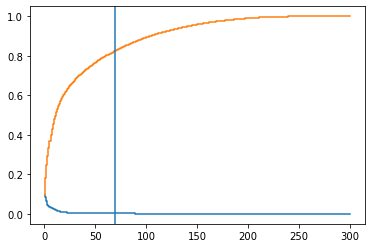

In [30]:
#run pca
V, cache = pcaifier(ordered_embeddings, 69)

V: <class 'numpy.ndarray'> (300, 300)
Ordered_embeddings: <class 'numpy.ndarray'> (3027000, 300)
X_reduced: (3027000, 2)
X_reduced: (3027000, 3)
X_reduced: (3027000, 3)
X_reduced: (3027000, 3)
X_reduced: (3027000, 3)
X_reduced: (3027000, 3)
X_reduced: (3027000, 3)


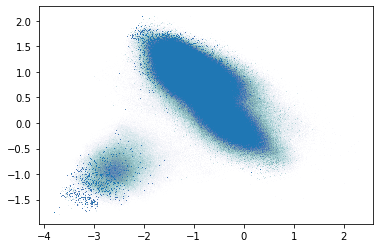

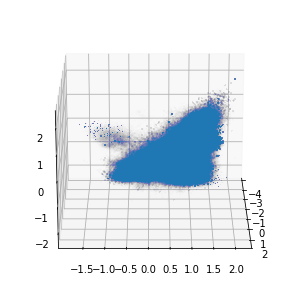

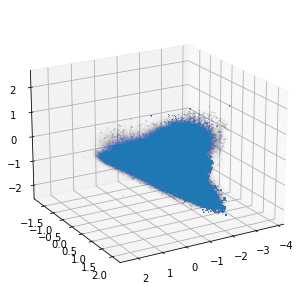

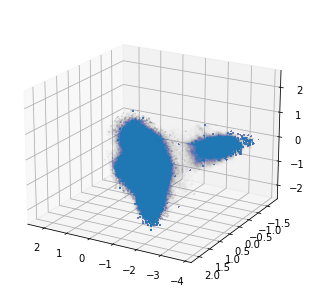

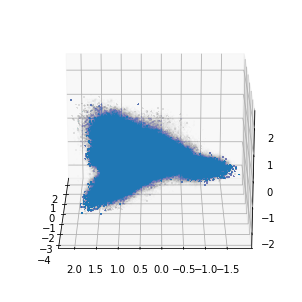

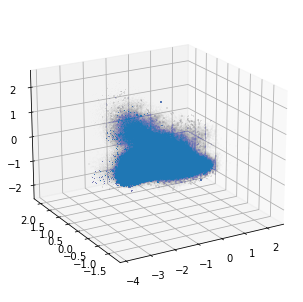

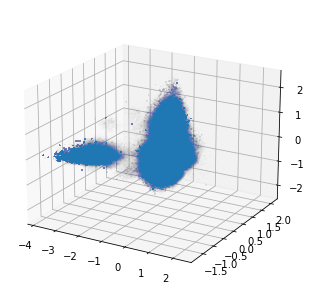

In [31]:
# visualize data 2 and 3 d
print("V:", type(V),V.shape)
print("Ordered_embeddings:",type(ordered_embeddings), ordered_embeddings.shape)
visualize_2D(ordered_embeddings, V)
for i in range(0,360,60):
  visualize_3D(ordered_embeddings, V, azim = i)

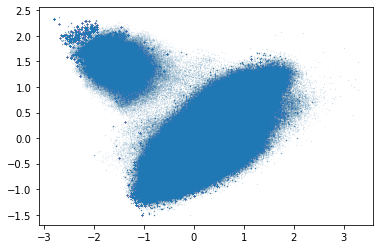

In [32]:
#compare with sklearn pca (sanity check)
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(ordered_embeddings)
plt.scatter(X_reduced[:,0], X_reduced[:,1], s = 0.0007)

Examine Clusters by looking at the black cards 2D


               v1        v2 Sentence_start
0       -0.456837  0.828570       Hey Redd
1       -0.340179  0.714484       Hey Redd
2       -0.231557  0.524212       Hey Redd
3       -0.319940  0.568725       Hey Redd
4        0.397660  0.155155       Hey Redd
...           ...       ...            ...
3026995 -0.957093  0.608784       War!What
3026996 -1.769763  1.228147       War!What
3026997 -0.816704  0.682124       War!What
3026998 -0.400132  0.706599       War!What
3026999 -1.531174  0.988352       War!What

[3027000 rows x 3 columns]


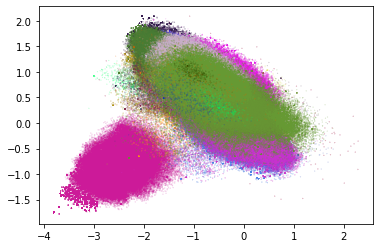

In [33]:
#colored plot for for different black cards 2D
import pandas as pd
import random

#get the characteristic sentence starts
charstart = ['OTHERS']
for s in bc:
    start = s[:8]
    charstart.append(start)

#get X_reduced and put into the dataframe
X_reduced = ordered_embeddings@V[:, :2]
df = pd.DataFrame({"v1": X_reduced[:,0], "v2": X_reduced[:,1]})

#get corresponding characteristic starts
col3 = []
for key in ordered_cards:
    start = key[:8]
    if start in charstart:
      col3.append(start)
    else:
      col3.append("OTHERS")

#set up corresponding colors (have to use random??)
colors = {}
for key in charstart:
    colors[key] = (round(random.random(),1),round(random.random(),1),round(random.random(),1))

df["Sentence_start"] = col3
print(df)
fig, ax = plt.subplots()
ax.scatter(df['v1'], df['v2'], c=df['Sentence_start'].map(colors), s = 0.008)

plt.show()

----------------------------------------------


**Visualizing Selected Black Card Clusters 3D**

In [34]:
Color_configuration = "show_all" #enter the first 8 letter of the black card you want to visualize e.g. "Hey Redd"
                                 #enter "show_all" to visualize all black card clusters. However, their colours are randomized so it is recommaned to look at the black card one by one

In [35]:
#Availuable 8-letter prefixes for black cards:
charstart = ['OTHERS']
for s in bc:
    start = s[:8]
    charstart.append(start) if "_" not in start else ""
print("Sentences:")
print(bc)
print("Availuable 8-letter prefixes for black cards: (ignore ones with _ )")
print(charstart)

Sentences:
['Hey Reddit! I’m _.Ask me anything.', 'Introducing X-treme Baseball!It’s like baseball, but with _!', 'What is Batman’s guilty pleasure?_.', 'TSA guidelines now prohibit _ on airplanes.', 'Next from J.K. Rowling: _.', 'That’s right, I killed _.How, you ask?_.', 'I’m sorry professor, but I couldn’t complete my homework because of _.', 'And the Academy Award for _ goes to _.', 'Dude, do not go in that bathroom.There’s _ in there.', 'How did I lose my virginity?_.', 'It’s a pity that kids these days are all getting involved with _.', 'Step 1: _.Step 2: _.Step 3: Profit.', '_.Becha can’t have just one!', 'Kids, I don’t need drugs to get high. I’m high on _.', 'For my next trick, I will pull _ out of _.', 'While the United States raced the Soviet Union to the moon, the Mexican government funneled millions of pesos into research on _.', 'In the new Disney Channel Original Movie, Hannah Montana struggles with _ for the first time.', 'What’s my secret power?_.', 'I’m going on a cle

In [38]:
#colored plot for for different black cards 3D
import pandas as pd
import random

def plot_3D_PCA(ordered_cards, ordered_embeddings, V, Color_configuration = "show_all"):

    #get the characteristic sentence starts
    charstart = ['OTHERS']
    for s in bc:
        start = s[:8]
        charstart.append(start)

    #get X_reduced and put into the dataframe
    X_reduced = ordered_embeddings@V[:, :3]
    df = pd.DataFrame({"v1": X_reduced[:,0], "v2": X_reduced[:,1], "v3": X_reduced[:,2]})

    #get corresponding characteristic starts
    col3 = []
    for key in ordered_cards:
        start = key[:8]
        if start in charstart:
          col3.append(start)
        else:
          col3.append("OTHERS")

    #color configuration (have to use random??)
    colors = {}
    for key in charstart:
        if Color_configuration == "show_all":
            colors[key] = (round(random.random(),1),round(random.random(),1),round(random.random(),1))
        else:
            colors[key] = 'black' if key == Color_configuration else 'moccasin'

    df["Sentence_start"] = col3
    print(df)
    fig, ax = plt.subplots()
    ax.scatter(df['v1'], df['v2'], c=df['Sentence_start'].map(colors), s = 0.0001)

    for i in range(0,360,60):
        fig = plt.figure()
        ax = Axes3D(fig)

        ax.view_init(elev=20, azim=i)
        ax.scatter(df['v1'], df['v2'],df['v3'], c=df['Sentence_start'].map(colors), s = 0.0001)

               v1        v2        v3 Sentence_start
0       -0.456837  0.828570 -0.627765       Hey Redd
1       -0.340179  0.714484 -0.109871       Hey Redd
2       -0.231557  0.524212 -0.731058       Hey Redd
3       -0.319940  0.568725 -0.595352       Hey Redd
4        0.397660  0.155155 -0.672773       Hey Redd
...           ...       ...       ...            ...
3026995 -0.957093  0.608784 -0.772893       War!What
3026996 -1.769763  1.228147 -1.403117       War!What
3026997 -0.816704  0.682124 -1.178436       War!What
3026998 -0.400132  0.706599 -0.542062       War!What
3026999 -1.531174  0.988352 -0.640630       War!What

[3027000 rows x 4 columns]


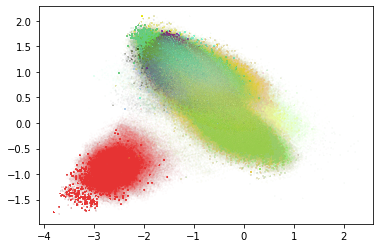

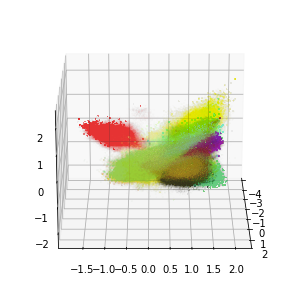

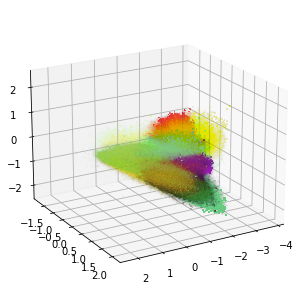

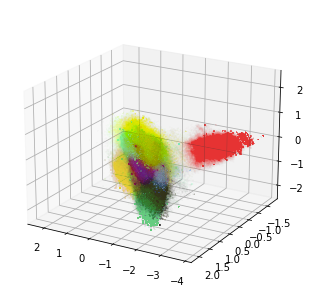

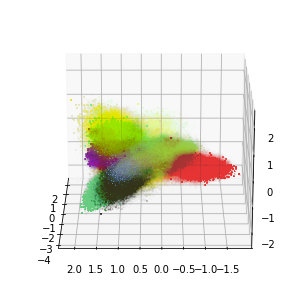

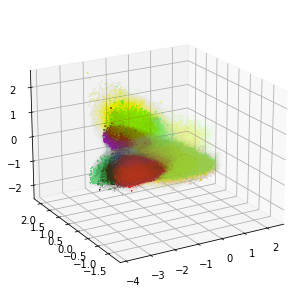

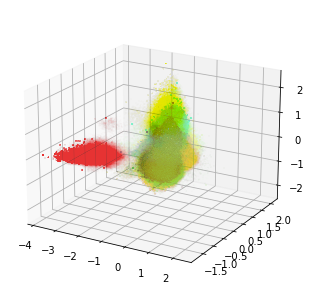

In [39]:
plot_3D_PCA(ordered_cards, ordered_embeddings, V, Color_configuration = Color_configuration)

**Now Try the 2 card combos (2 wc + 1 bc) with the cache from the PCA**

In [ ]:
b#@title Default title text
#get the two slot cards
two_slots = []
bcs = [i.split("_") for i in bc]
for b in bcs:
        t = b
        b = [i.strip() for i in b]
        

        if len(b) == 3:
            two_slots.append(t[0]+"_"+t[1]+"_"+t[2])

print(len(two_slots), two_slots)

# get one of the two slot bc sentence
sample_sentence = two_slots[4]
print("---------")
print("The bc selected to visualize is:", sample_sentence)

12 ['That’s right, I killed _.How, you ask?_.', 'And the Academy Award for _ goes to _.', 'Step 1: _.Step 2: _.Step 3: Profit.', 'For my next trick, I will pull _ out of _.', 'When I was tripping on acid, _ turned into _.', 'My fellow Americans: Before this decade is out, we _, have _ on the moon.', '_ is a slippery slope that leads to _.', 'In M. Night Shyamalan’s new movie, Bruce Willis discovers that _ had really been _ all along.', 'I never truly understood _ until I encountered _.', 'They said we were crazy. They said we couldn’t put _ inside of _.They were wrong.', 'Lifetime® presents “_: the Story of _.”', 'What’s the next superhero/sidekick duo?_/_.']
---------
The bc selected to visualize is: When I was tripping on acid, _ turned into _.


In [ ]:
# get the permutation of that sentence. We will take the sample of 5000 perms.
ss = sample_sentence.split("_")
twoc = [i for i in itertools.permutations(wc, 2)]
plays = []

b = [i.strip() for i in ss]
for p in twoc:
    s = b[0] + " " + p[0] + " " +  b[1] + " " + p[1] + b[2]
    s.replace(". ", " .")
    plays.append(s)
#shuffle the plays so that sample is not biased
random.shuffle(plays)
#take 5000 samples
samples = plays[:5000]

In [ ]:
#get the embeddings of the samples
from tqdm import tqdm
embeddings_two_slots_samples_dict = {}
for c in tqdm(samples):
    embeddings_two_slots_samples_dict[c] = s_model.encode(c)

100%|██████████| 5000/5000 [05:45<00:00, 14.46it/s]


In [ ]:
#put into the ordered form
embed_dict = {}
embed_dict.update(embeddings_two_slots_samples_dict)
embed_dict.update(embeddings)
print(len(embed_dict), type(embed_dict))

ordered_sample = list(embed_dict.keys())
ordered_sample_embeddings = [embed_dict[i] for i in ordered_sample]

38000 <class 'dict'>


             v1        v2        v3 Sentence_start
0     -0.119271 -6.014647 -1.774739       When I w
1      2.780097 -6.591386  1.353639       When I w
2      2.074059  0.810468 -2.512003       When I w
3      6.862609 -2.862864  1.790852       When I w
4     -2.104790 -3.832179 -0.124949       When I w
...         ...       ...       ...            ...
37995 -3.004955 -3.007550  2.609645       War!What
37996 -6.751503 -4.495399  1.855679       War!What
37997 -0.615119  0.885593  3.189418       War!What
37998 -2.252577  0.534591  2.579501       War!What
37999 -4.329649 -4.677212  4.147744       War!What

[38000 rows x 4 columns]


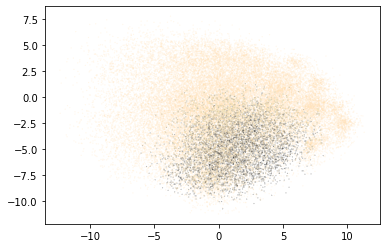

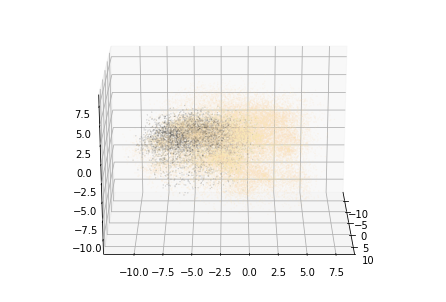

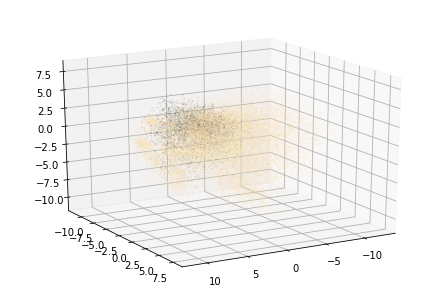

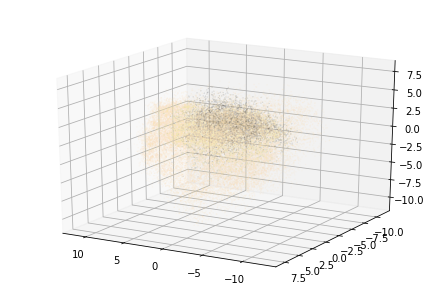

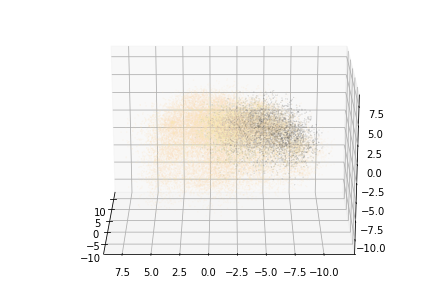

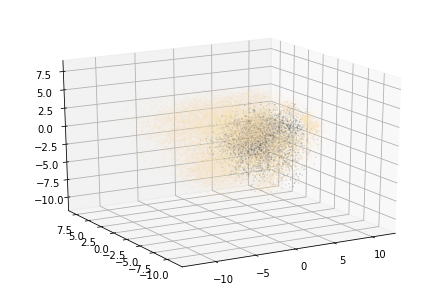

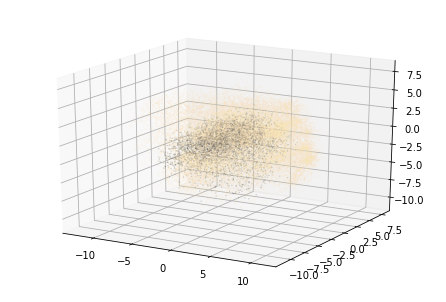

In [ ]:
# Visualize
Color_configuration = sample_sentence[:8]
V_sample = cache["eigenvectors"]
plot_3D_PCA(ordered_sample, ordered_sample_embeddings, V_sample, Color_configuration = Color_configuration)